## EDA on Hockey Dataset

In [1]:
import pandas as pd

In [2]:
import os
os.chdir('d:/Datasets')

In [3]:
df = pd.read_csv('hockey1.csv')

In [4]:
df.head()

Team Name  Year  Wins  Losses  OT Losses  Win %  Goal For (GF)  \
0       Boston Bruins  1990    44      24        NaN     35            299   
1      Buffalo Sabres  1990    31      30        NaN     14            292   
2      Calgary Flames  1990    46      26        NaN     81            344   
3  Chicago Blackhawks  1990    49      23        NaN     73            284   
4   Detroit Red Wings  1990    34      38        NaN    -25            273   

   Goal Against (GA)  + / -  
0                264     35  
1                278     14  
2                263     81  
3                211     73  
4                298    -25

## Perform Qaulity checks

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Team Name          582 non-null    object 
 1   Year               582 non-null    int64  
 2   Wins               582 non-null    int64  
 3   Losses             582 non-null    int64  
 4   OT Losses          358 non-null    float64
 5   Win %              582 non-null    int64  
 6   Goal For (GF)      582 non-null    int64  
 7   Goal Against (GA)  582 non-null    int64  
 8   + / -              582 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 41.1+ KB


In [6]:
s = df.isna().sum()
s[s>0]

OT Losses    224
dtype: int64

In [7]:
df.duplicated().sum()

0

## Dropping OT Losses Column because higher rate of missing values

In [8]:
df2 = df.drop(columns='OT Losses')

In [9]:
df['Team Name'].value_counts()

Boston Bruins              21
New Jersey Devils          21
Washington Capitals        21
Vancouver Canucks          21
Buffalo Sabres             21
St. Louis Blues            21
Pittsburgh Penguins        21
Philadelphia Flyers        21
New York Rangers           21
New York Islanders         21
Toronto Maple Leafs        21
Montreal Canadiens         21
Calgary Flames             21
Los Angeles Kings          21
Edmonton Oilers            21
Detroit Red Wings          21
Chicago Blackhawks         21
San Jose Sharks            20
Ottawa Senators            19
Tampa Bay Lightning        19
Dallas Stars               18
Florida Panthers           18
Colorado Avalanche         16
Phoenix Coyotes            15
Carolina Hurricanes        14
Nashville Predators        13
Mighty Ducks of Anaheim    12
Atlanta Thrashers          11
Columbus Blue Jackets      11
Minnesota Wild             11
Winnipeg Jets               7
Hartford Whalers            7
Anaheim Ducks               6
Quebec Nor

## For each Team show the total amount of wins

In [10]:
team_wins = df.groupby('Team Name')['Wins'].sum()
team_wins

Team Name
Anaheim Ducks              257
Atlanta Thrashers          342
Boston Bruins              816
Buffalo Sabres             803
Calgary Flames             764
Carolina Hurricanes        515
Chicago Blackhawks         765
Colorado Avalanche         677
Columbus Blue Jackets      342
Dallas Stars               752
Detroit Red Wings          986
Edmonton Oilers            692
Florida Panthers           573
Hartford Whalers           195
Los Angeles Kings          730
Mighty Ducks of Anaheim    381
Minnesota North Stars       95
Minnesota Wild             405
Montreal Canadiens         783
Nashville Predators        503
New Jersey Devils          905
New York Islanders         650
New York Rangers           792
Ottawa Senators            679
Philadelphia Flyers        836
Phoenix Coyotes            557
Pittsburgh Penguins        839
Quebec Nordiques           147
San Jose Sharks            721
St. Louis Blues            811
Tampa Bay Lightning        588
Toronto Maple Leafs        76

## For each Team show the total amount of losses

In [11]:
team_loss = df.groupby('Team Name')['Losses'].sum()
team_loss

Team Name
Anaheim Ducks              178
Atlanta Thrashers          437
Boston Bruins              614
Buffalo Sabres             648
Calgary Flames             675
Carolina Hurricanes        461
Chicago Blackhawks         675
Colorado Avalanche         462
Columbus Blue Jackets      441
Dallas Stars               487
Detroit Red Wings          480
Edmonton Oilers            758
Florida Panthers           605
Hartford Whalers           281
Los Angeles Kings          707
Mighty Ducks of Anaheim    427
Minnesota North Stars      119
Minnesota Wild             362
Montreal Canadiens         667
Nashville Predators        424
New Jersey Devils          564
New York Islanders         819
New York Rangers           678
Ottawa Senators            651
Philadelphia Flyers        598
Phoenix Coyotes            498
Pittsburgh Penguins        642
Quebec Nordiques           180
San Jose Sharks            672
St. Louis Blues            626
Tampa Bay Lightning        732
Toronto Maple Leafs        69

## Find the net win percentage for Each Team

In [12]:
team_stats = df.groupby('Team Name').agg({'Wins': 'sum', 'Losses': 'sum'})
team_stats

Wins  Losses
Team Name                            
Anaheim Ducks             257     178
Atlanta Thrashers         342     437
Boston Bruins             816     614
Buffalo Sabres            803     648
Calgary Flames            764     675
Carolina Hurricanes       515     461
Chicago Blackhawks        765     675
Colorado Avalanche        677     462
Columbus Blue Jackets     342     441
Dallas Stars              752     487
Detroit Red Wings         986     480
Edmonton Oilers           692     758
Florida Panthers          573     605
Hartford Whalers          195     281
Los Angeles Kings         730     707
Mighty Ducks of Anaheim   381     427
Minnesota North Stars      95     119
Minnesota Wild            405     362
Montreal Canadiens        783     667
Nashville Predators       503     424
New Jersey Devils         905     564
New York Islanders        650     819
New York Rangers          792     678
Ottawa Senators           679     651
Philadelphia Flyers       836     598
Phoenix Coyotes           557     498
Pittsburgh Penguins       839     642
Quebec Nordiques          147     180
San Jose Sharks           721     672
St. Louis Blues           811     626
Tampa Bay Lightning       588     732
Toronto Maple Leafs       767     695
Vancouver Canucks         815     642
Washington Capitals       806     662
Winnipeg Jets             212     263

In [13]:
team_stats['Net Win Percentage'] = team_stats['Wins']/(team_stats['Wins'] + team_stats['Losses'])

In [14]:
team_stats

Wins  Losses  Net Win Percentage
Team Name                                                
Anaheim Ducks             257     178            0.590805
Atlanta Thrashers         342     437            0.439024
Boston Bruins             816     614            0.570629
Buffalo Sabres            803     648            0.553411
Calgary Flames            764     675            0.530924
Carolina Hurricanes       515     461            0.527664
Chicago Blackhawks        765     675            0.531250
Colorado Avalanche        677     462            0.594381
Columbus Blue Jackets     342     441            0.436782
Dallas Stars              752     487            0.606941
Detroit Red Wings         986     480            0.672578
Edmonton Oilers           692     758            0.477241
Florida Panthers          573     605            0.486418
Hartford Whalers          195     281            0.409664
Los Angeles Kings         730     707            0.508003
Mighty Ducks of Anaheim   381     427            0.471535
Minnesota North Stars      95     119            0.443925
Minnesota Wild            405     362            0.528031
Montreal Canadiens        783     667            0.540000
Nashville Predators       503     424            0.542611
New Jersey Devils         905     564            0.616065
New York Islanders        650     819            0.442478
New York Rangers          792     678            0.538776
Ottawa Senators           679     651            0.510526
Philadelphia Flyers       836     598            0.582985
Phoenix Coyotes           557     498            0.527962
Pittsburgh Penguins       839     642            0.566509
Quebec Nordiques          147     180            0.449541
San Jose Sharks           721     672            0.517588
St. Louis Blues           811     626            0.564370
Tampa Bay Lightning       588     732            0.445455
Toronto Maple Leafs       767     695            0.524624
Vancouver Canucks         815     642            0.559369
Washington Capitals       806     662            0.549046
Winnipeg Jets             212     263            0.446316

## Showing the top 5 teams with Highest win percentage.

In [15]:
Top_teams = team_stats['Net Win Percentage'].sort_values(ascending=False)[0:5]
Top_teams

Team Name
Detroit Red Wings     0.672578
New Jersey Devils     0.616065
Dallas Stars          0.606941
Colorado Avalanche    0.594381
Anaheim Ducks         0.590805
Name: Net Win Percentage, dtype: float64

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
team_stats_sorted = team_stats.sort_values(by='Net Win Percentage')

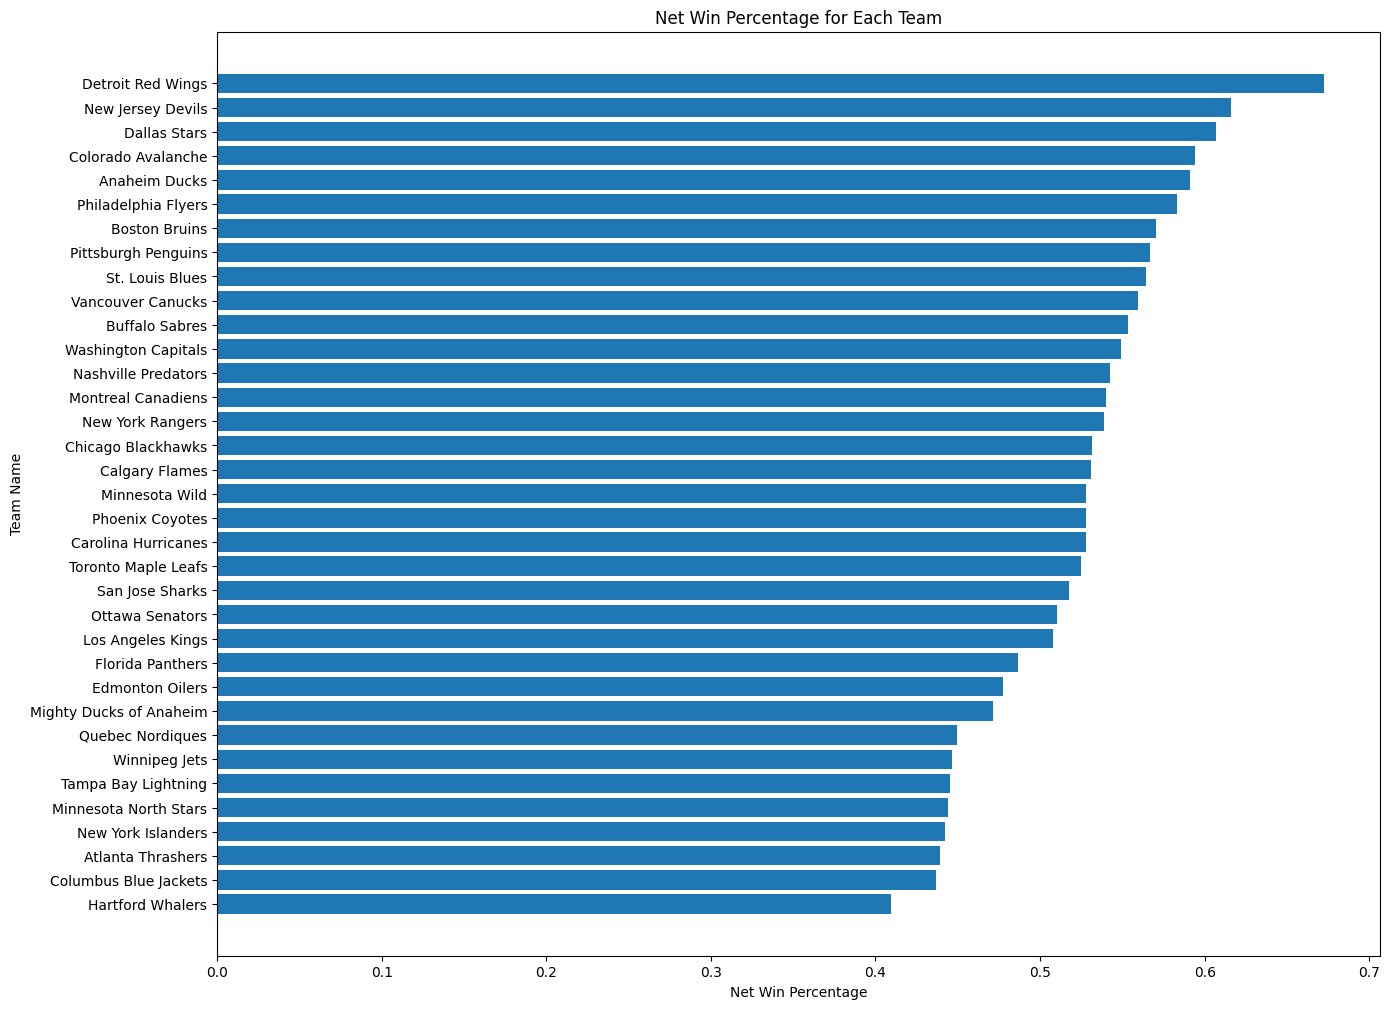

In [18]:
plt.figure(figsize=(15, 12))
plt.barh(team_stats_sorted.index, team_stats_sorted['Net Win Percentage'])
plt.xlabel('Net Win Percentage')
plt.ylabel('Team Name')
plt.title('Net Win Percentage for Each Team')
plt.show()

## Performing EDA on original Dataset

In [19]:
df.head()

Team Name  Year  Wins  Losses  OT Losses  Win %  Goal For (GF)  \
0       Boston Bruins  1990    44      24        NaN     35            299   
1      Buffalo Sabres  1990    31      30        NaN     14            292   
2      Calgary Flames  1990    46      26        NaN     81            344   
3  Chicago Blackhawks  1990    49      23        NaN     73            284   
4   Detroit Red Wings  1990    34      38        NaN    -25            273   

   Goal Against (GA)  + / -  
0                264     35  
1                278     14  
2                263     81  
3                211     73  
4                298    -25

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Team Name          582 non-null    object 
 1   Year               582 non-null    int64  
 2   Wins               582 non-null    int64  
 3   Losses             582 non-null    int64  
 4   OT Losses          358 non-null    float64
 5   Win %              582 non-null    int64  
 6   Goal For (GF)      582 non-null    int64  
 7   Goal Against (GA)  582 non-null    int64  
 8   + / -              582 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 41.1+ KB


## Seperate Cat and Con features

In [31]:
cat = list(df.columns[df.dtypes=='object'])

In [32]:
cat

['Team Name']

In [33]:
con = list(df.columns[df.dtypes!='object'])

In [34]:
con

['Year',
 'Wins',
 'Losses',
 'OT Losses',
 'Win %',
 'Goal For (GF)',
 'Goal Against (GA)',
 '+ / -']

In [36]:
df[cat].describe().T

count unique            top freq
Team Name   582     35  Boston Bruins   21

In [37]:
df[con].describe().T

count         mean        std     min     25%     50%  \
Year               582.0  2000.907216   6.330674  1990.0  1996.0  2001.0   
Wins               582.0    36.943299   8.926081     9.0    31.0    38.0   
Losses             582.0    32.353952   8.411439    11.0    27.0    31.0   
OT Losses          358.0     7.460894   3.610191     0.0     5.0     7.0   
Win %              582.0     0.312715  48.197690  -196.0   -27.0     4.5   
Goal For (GF)      582.0   234.063574  40.548915   115.0   211.0   231.0   
Goal Against (GA)  582.0   234.063574  42.510718   115.0   207.0   232.5   
+ / -              582.0     0.000000  45.277458  -196.0   -27.0     4.0   

                       75%     max  
Year               2007.00  2011.0  
Wins                 43.00    62.0  
Losses               37.00    71.0  
OT Losses            10.00    18.0  
Win %                34.75   103.0  
Goal For (GF)       254.00   369.0  
Goal Against (GA)   258.75   414.0  
+ / -                31.00   144.0

## Univariate for Categorical Features

Countplot

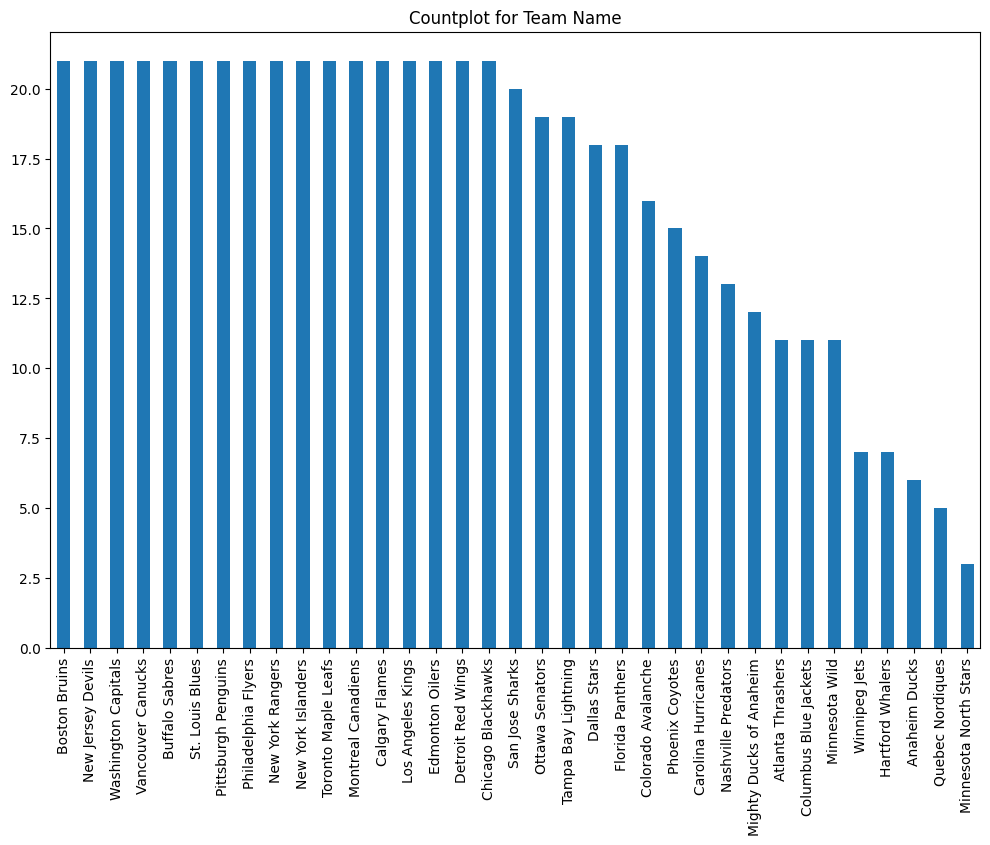

In [39]:
df['Team Name'].value_counts().plot(kind='bar', 
                                    title = 'Countplot for Team Name',
                                    figsize = (12,8))
plt.show()

## Univariate for Continuous features

Histogram

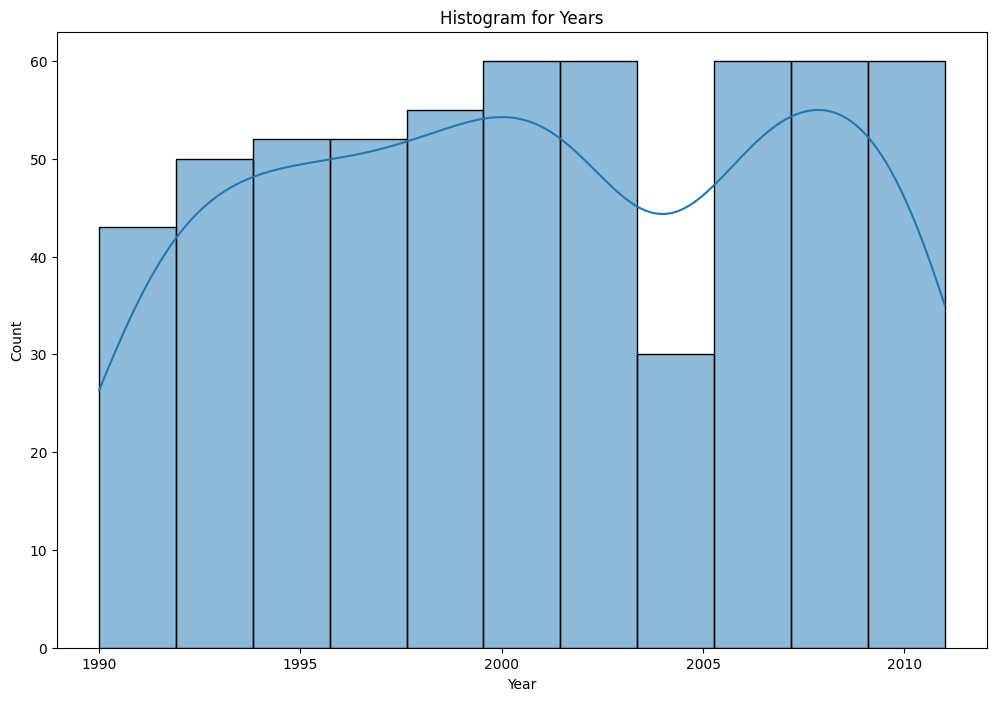

In [40]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='Year', kde=True)
plt.title('Histogram for Years')
plt.show()

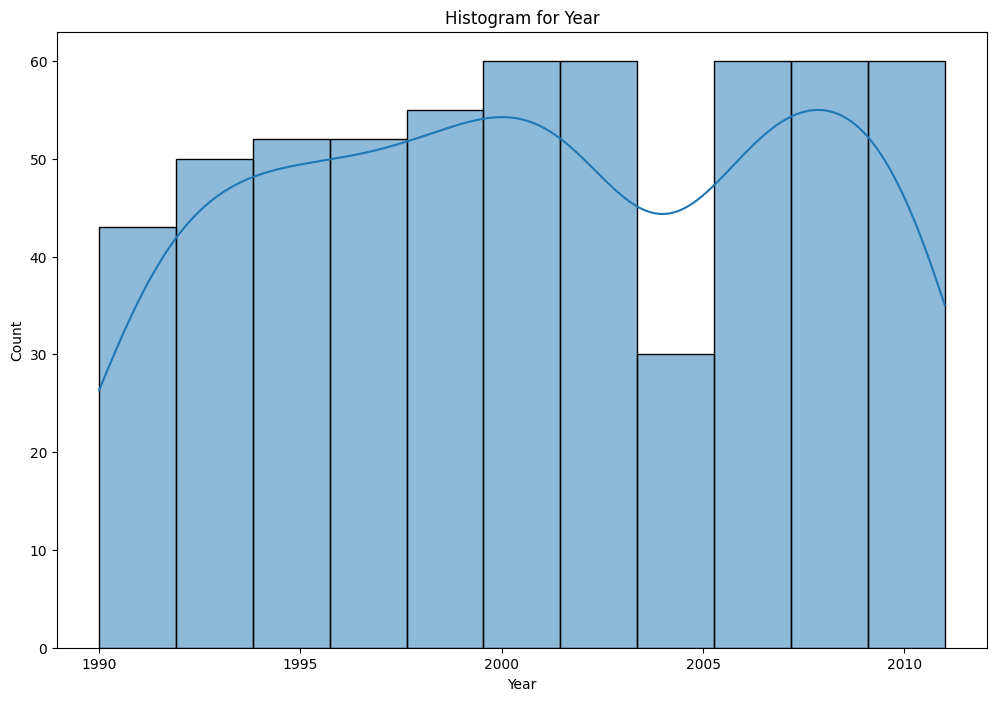

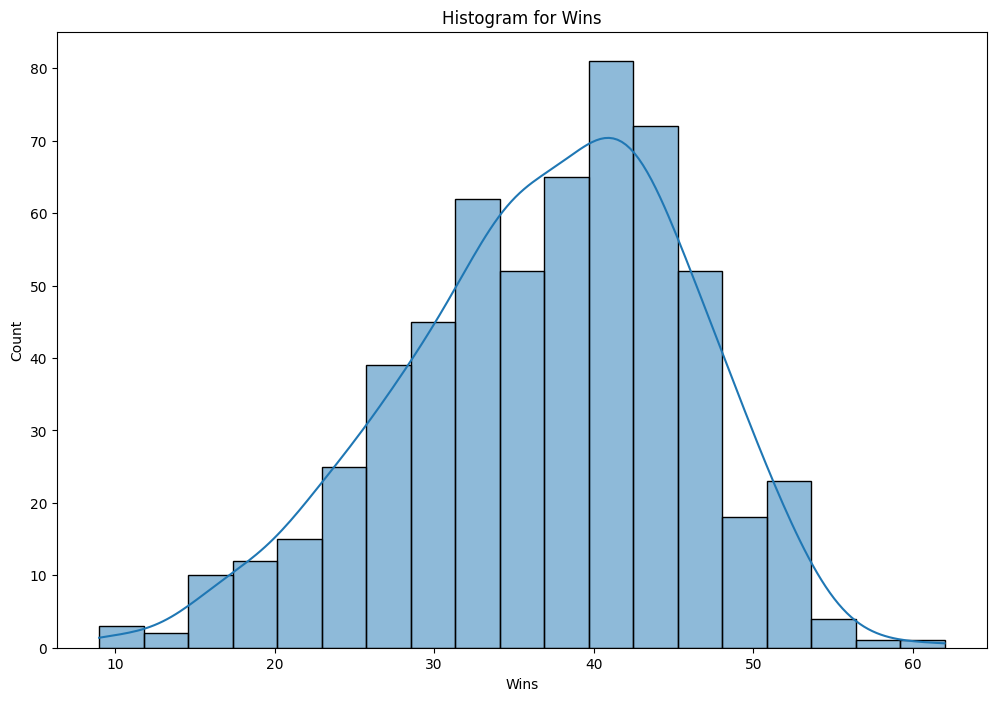

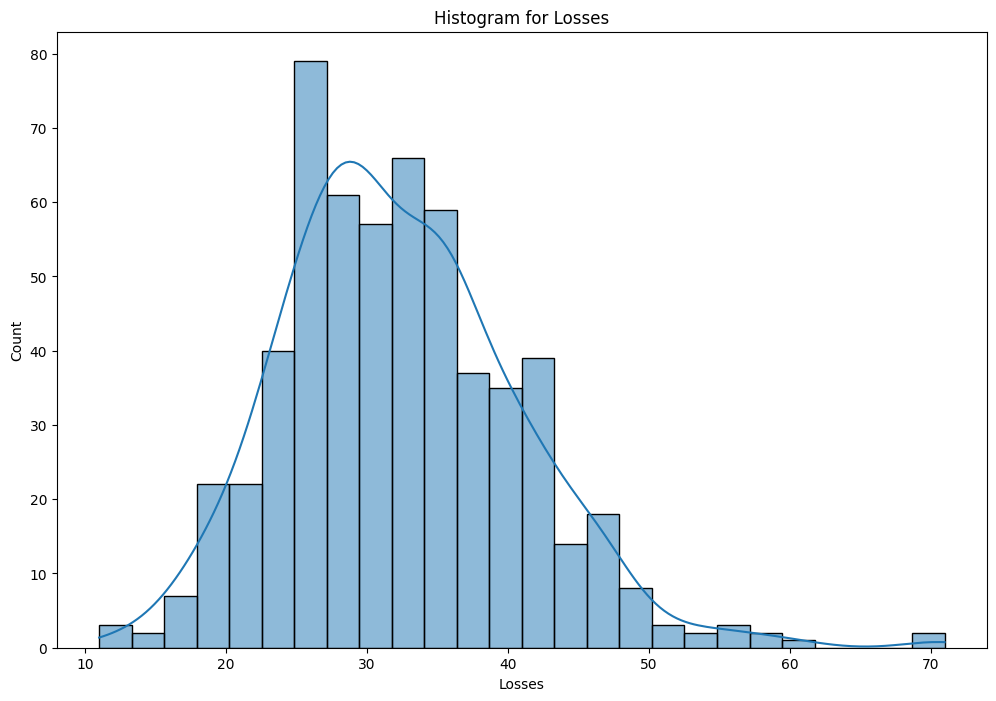

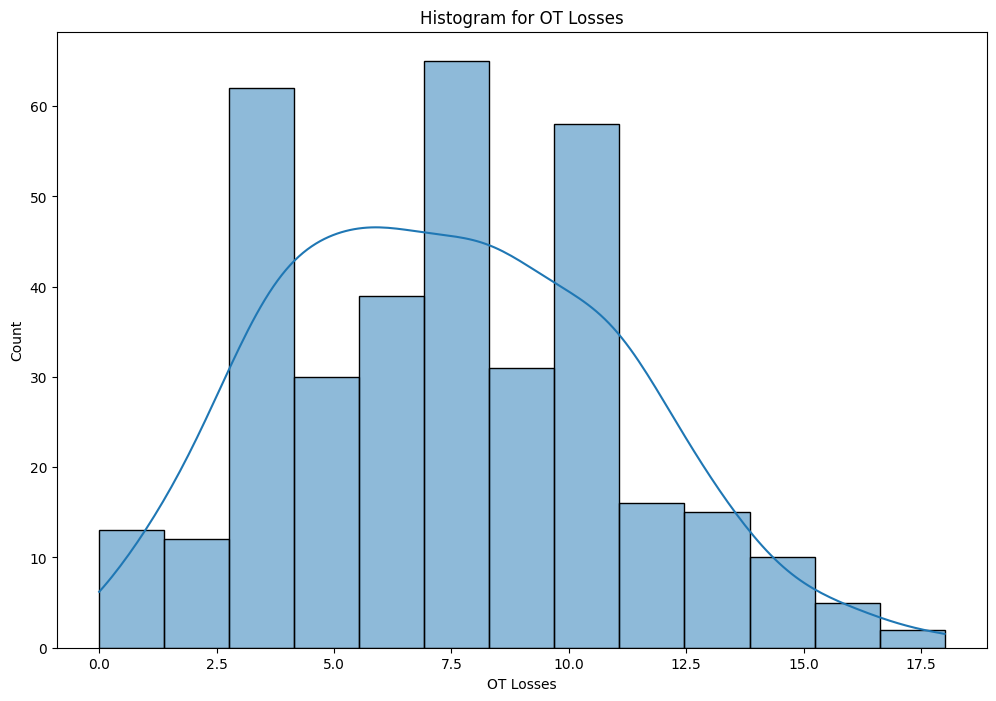

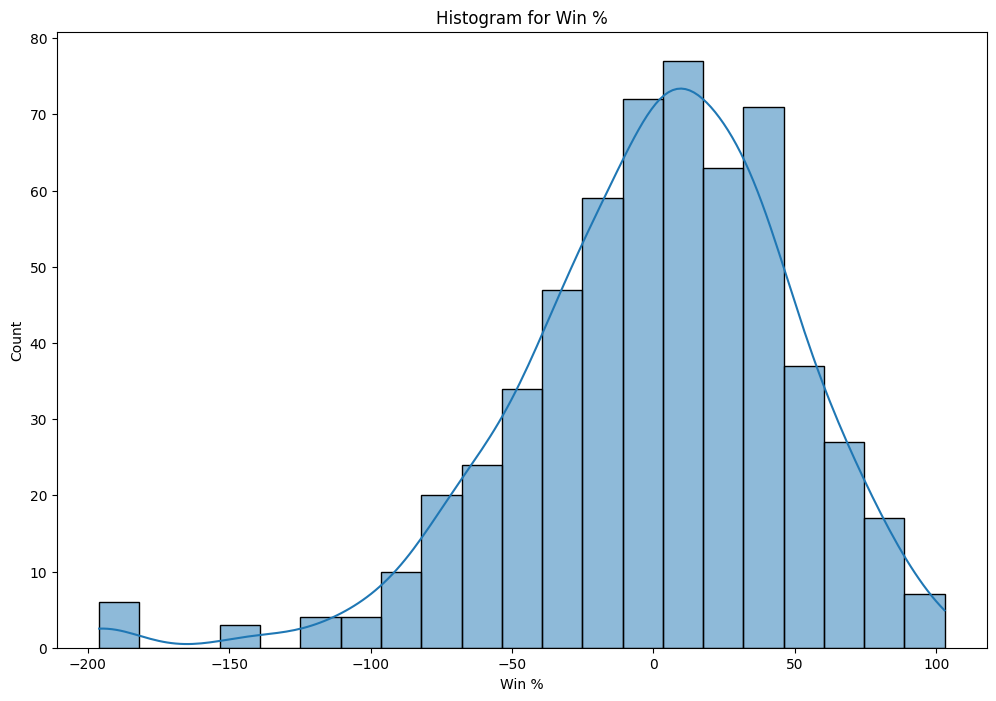

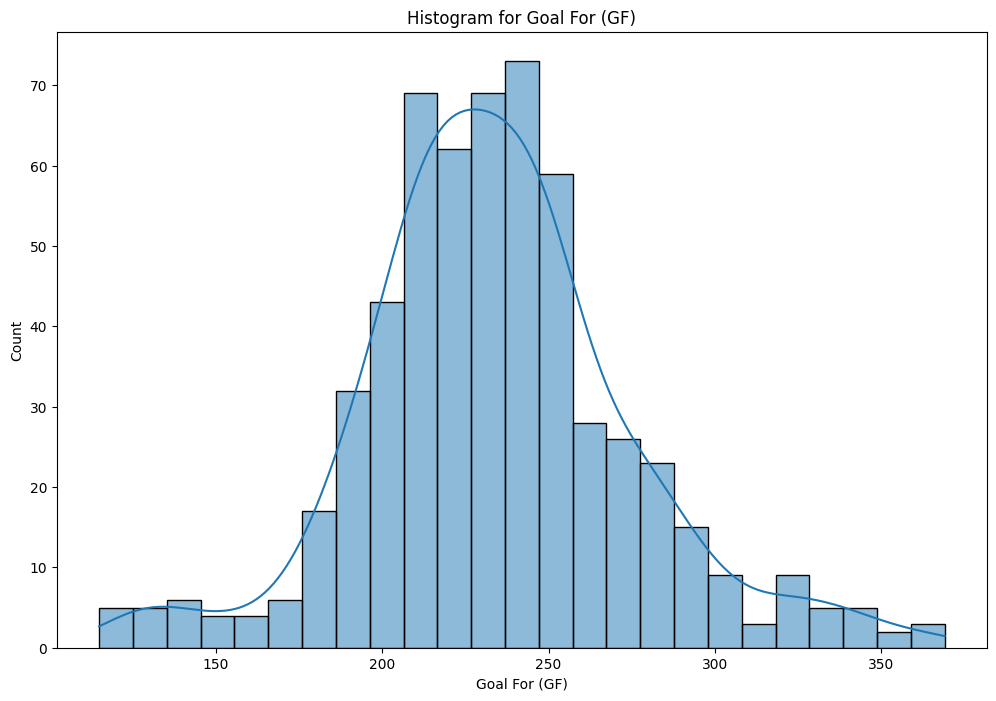

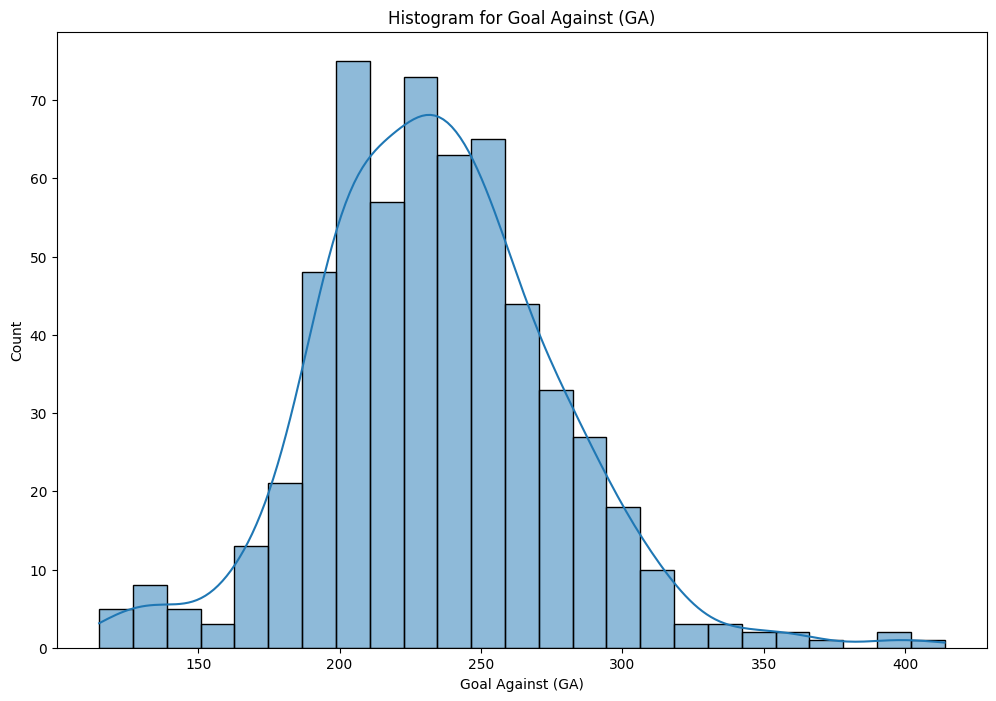

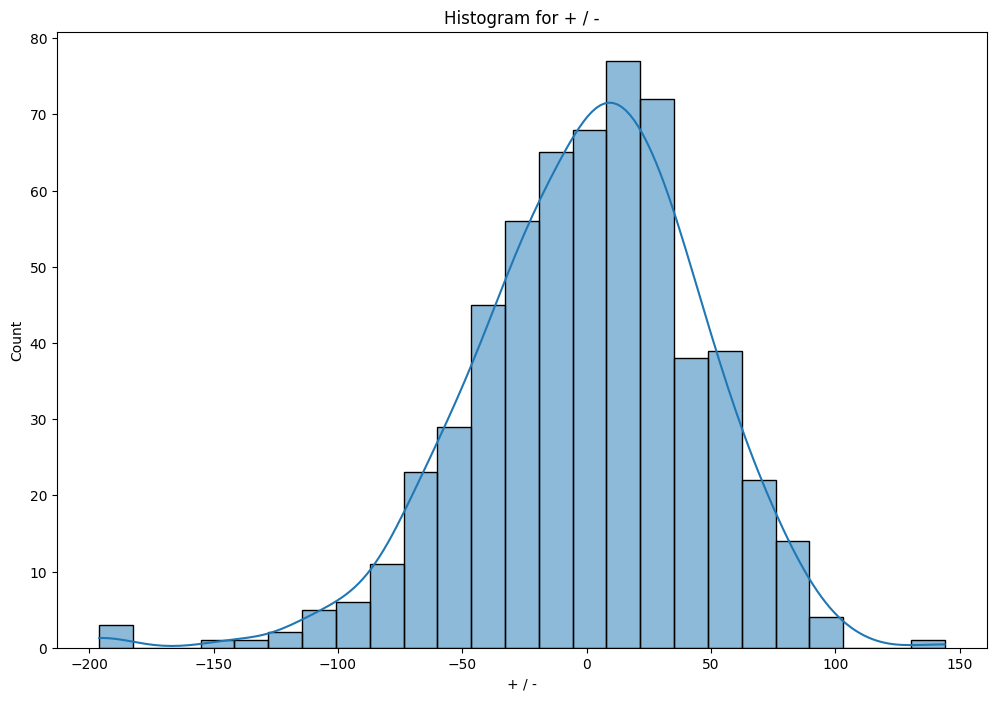

In [42]:
for i in con:
    plt.figure(figsize=(12,8))
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f'Histogram for {i}')
    plt.show()

## Bivariate

## Categorical vs Continuous
Boxplot

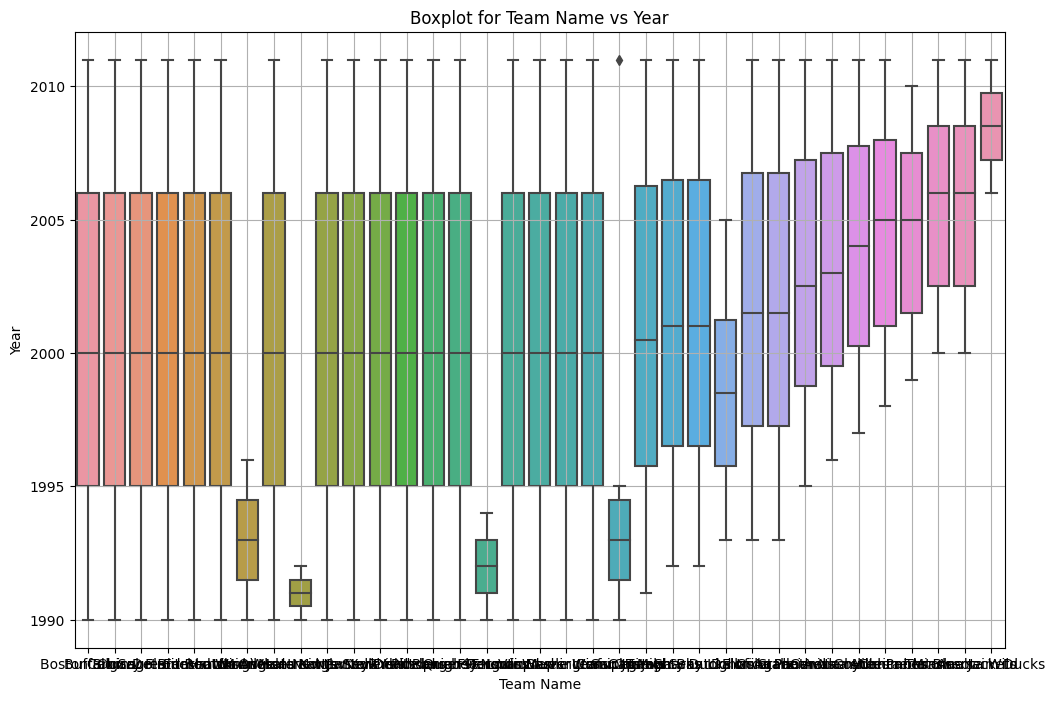

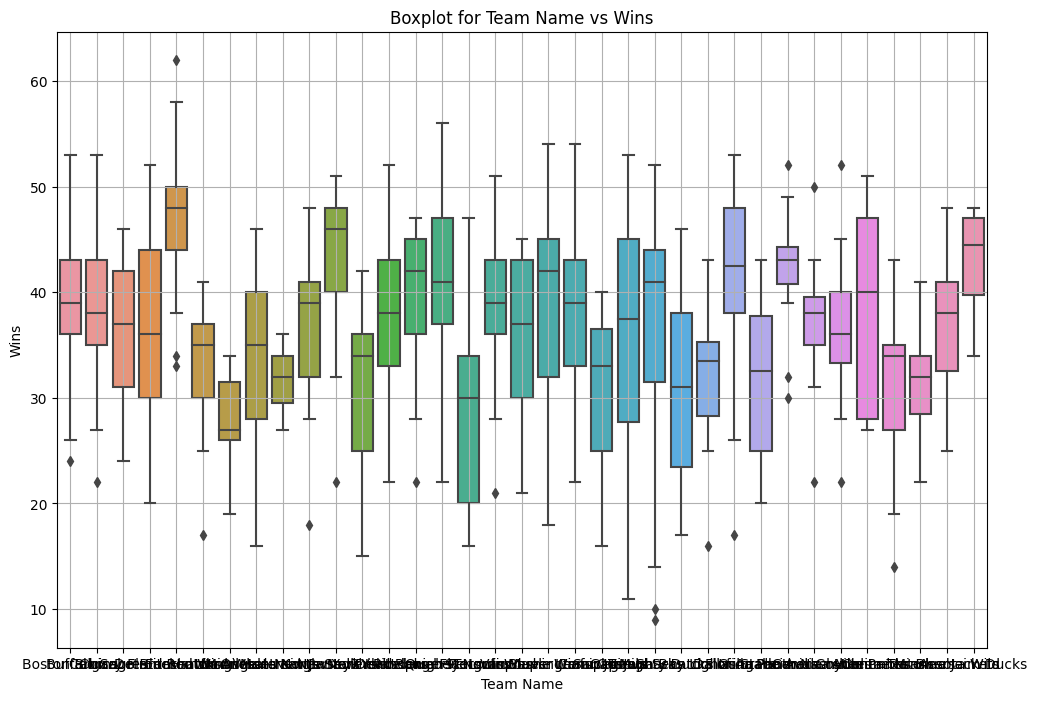

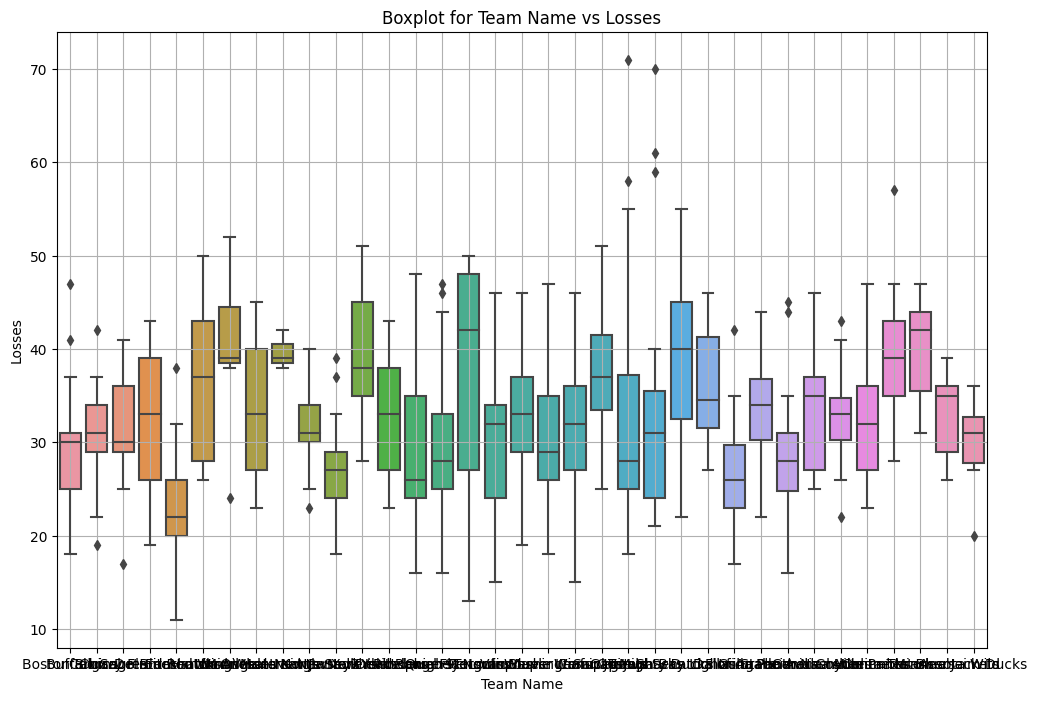

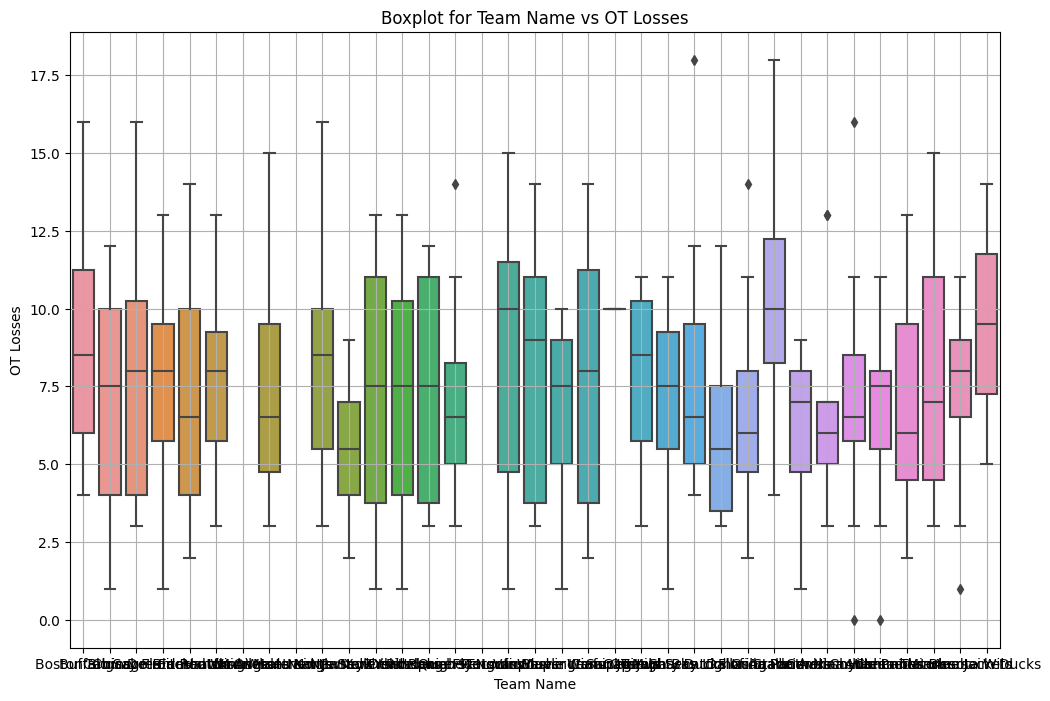

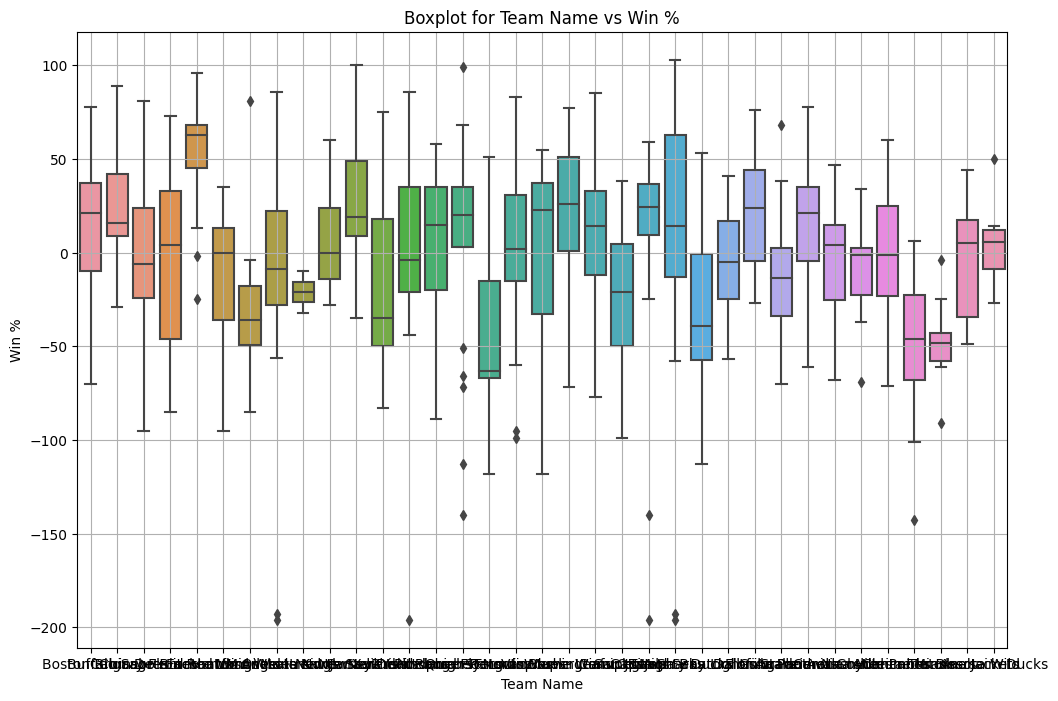

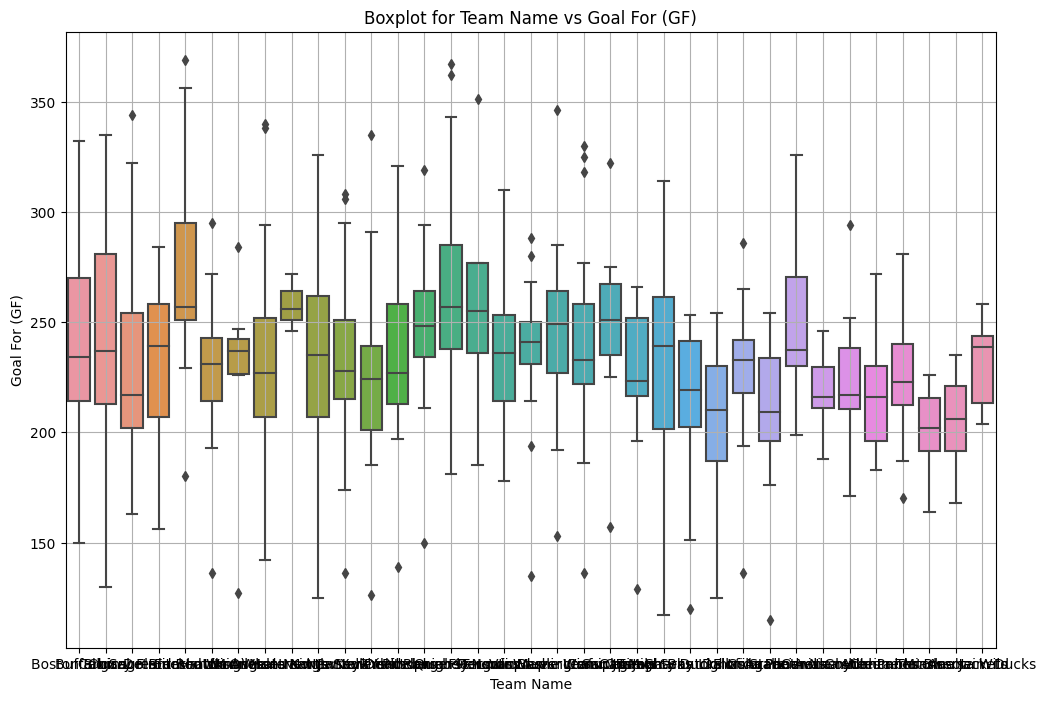

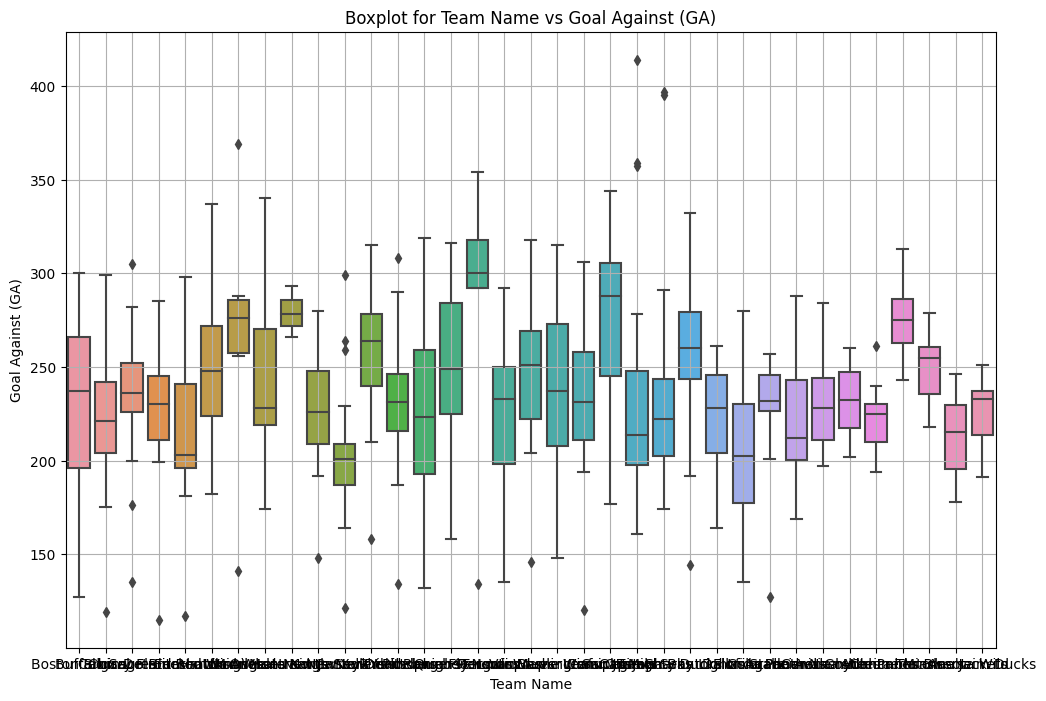

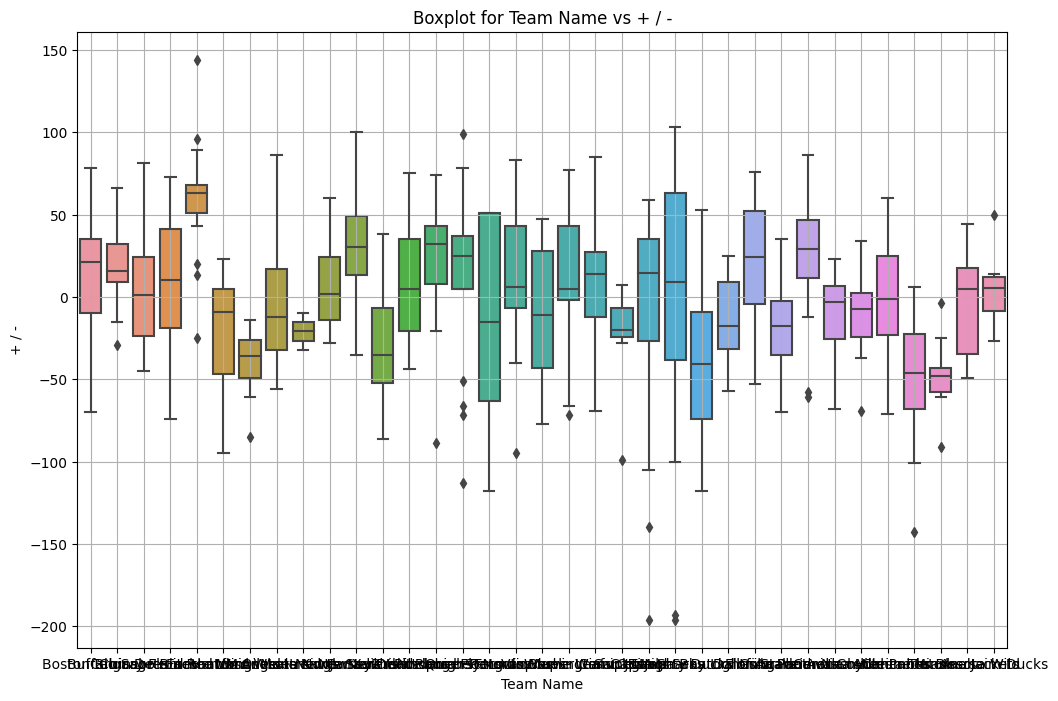

In [43]:
for i in con:
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df, x ='Team Name', y =i)
    plt.title(f'Boxplot for Team Name vs {i}')
    plt.grid()
    plt.show()

## Continuous vs Continuous
Scatterplot

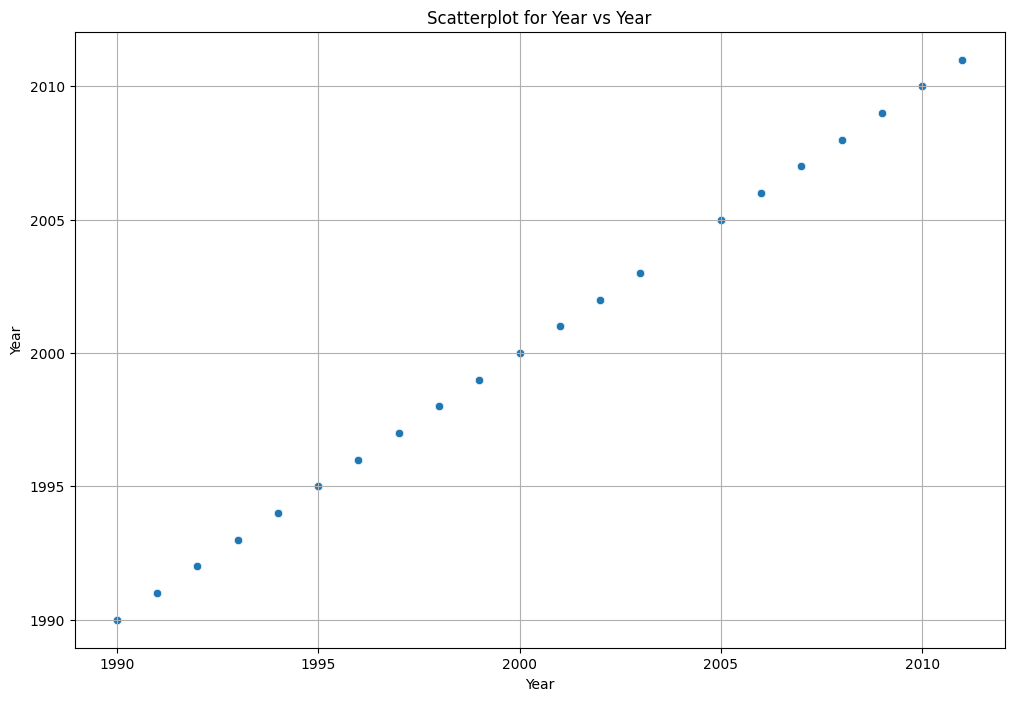

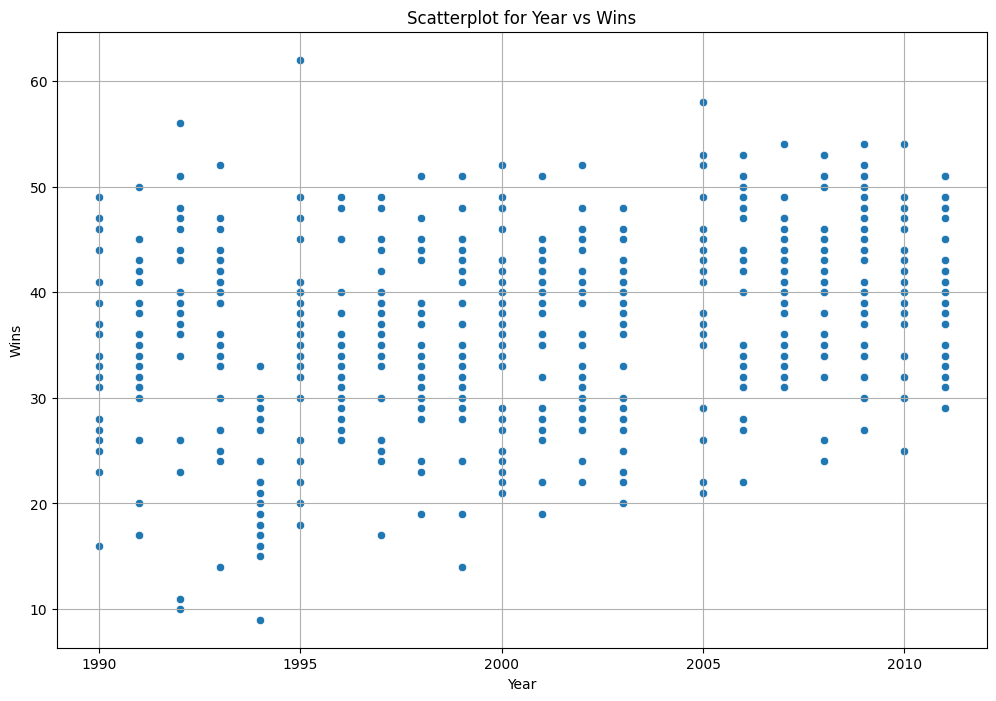

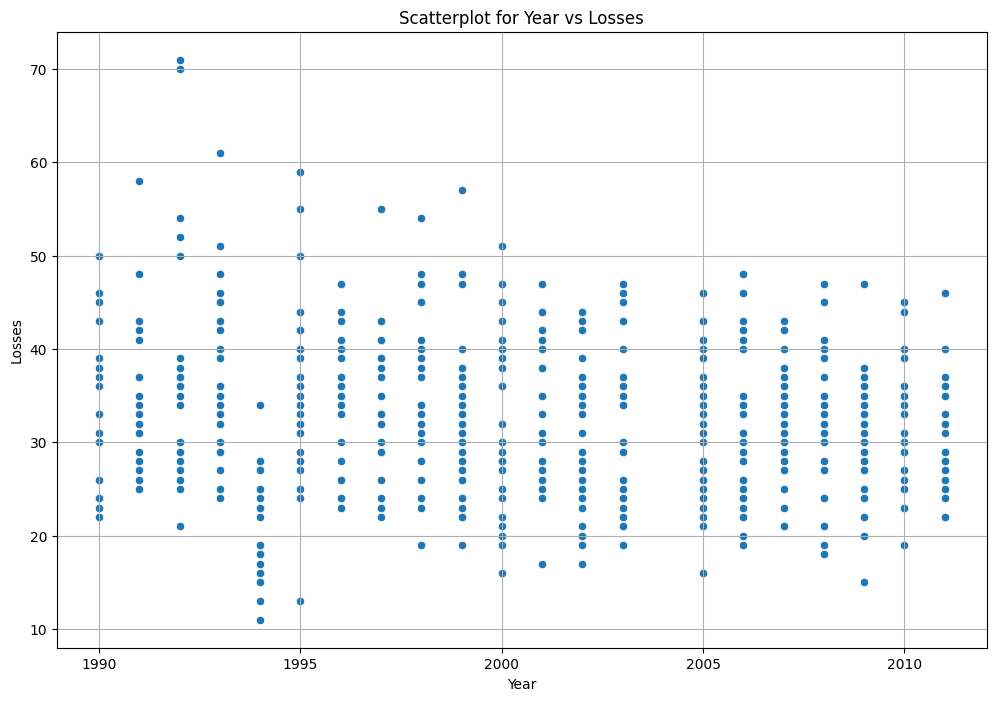

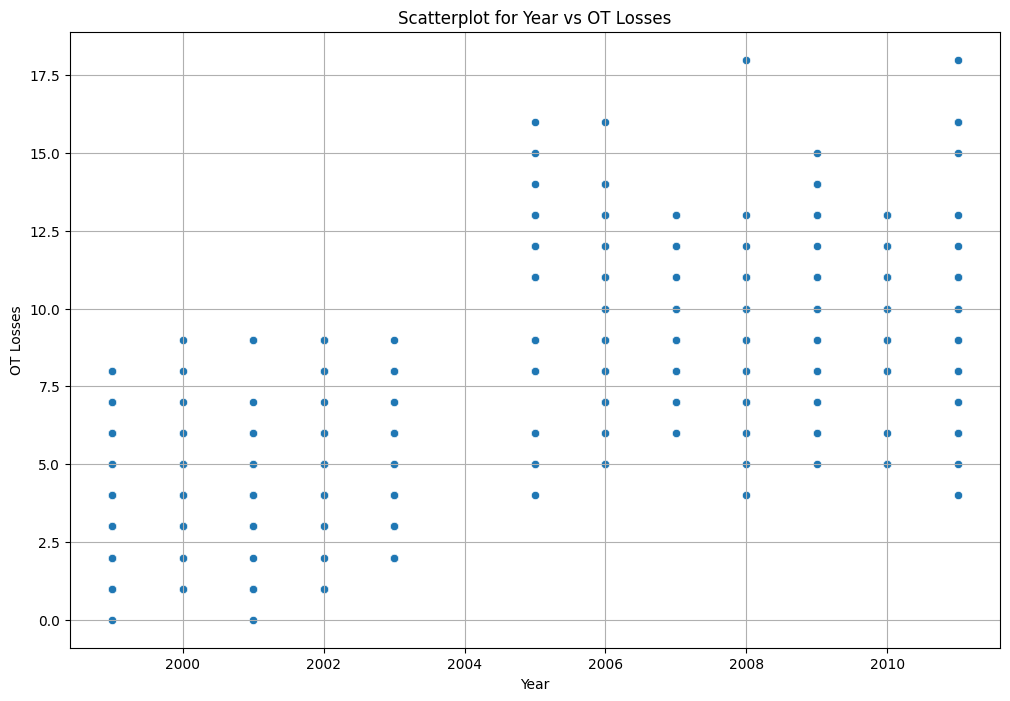

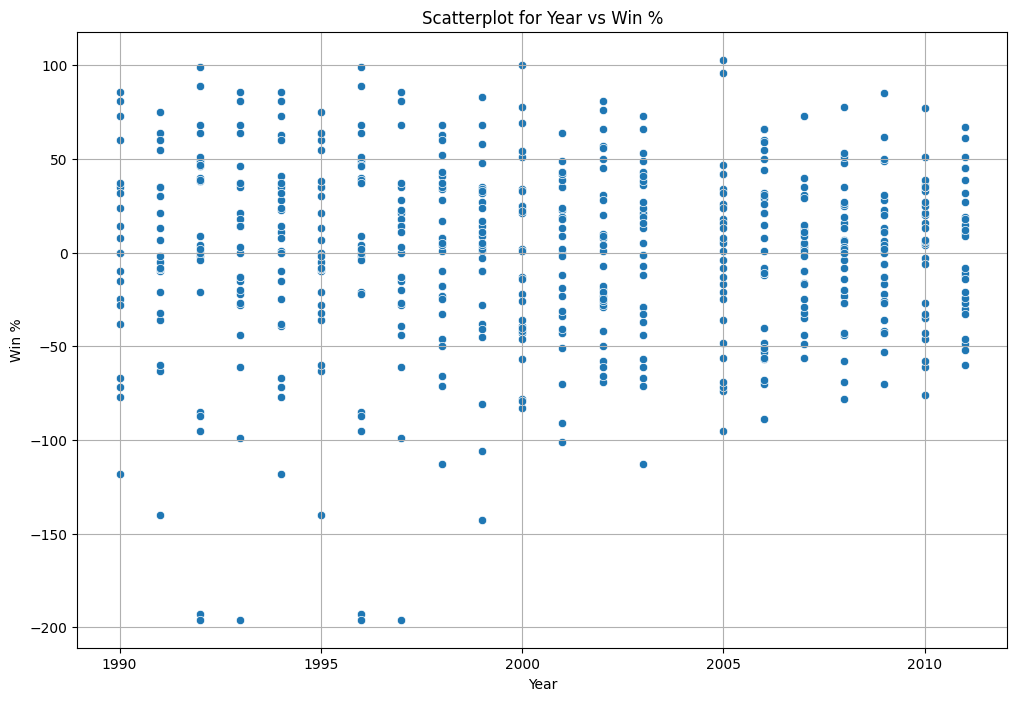

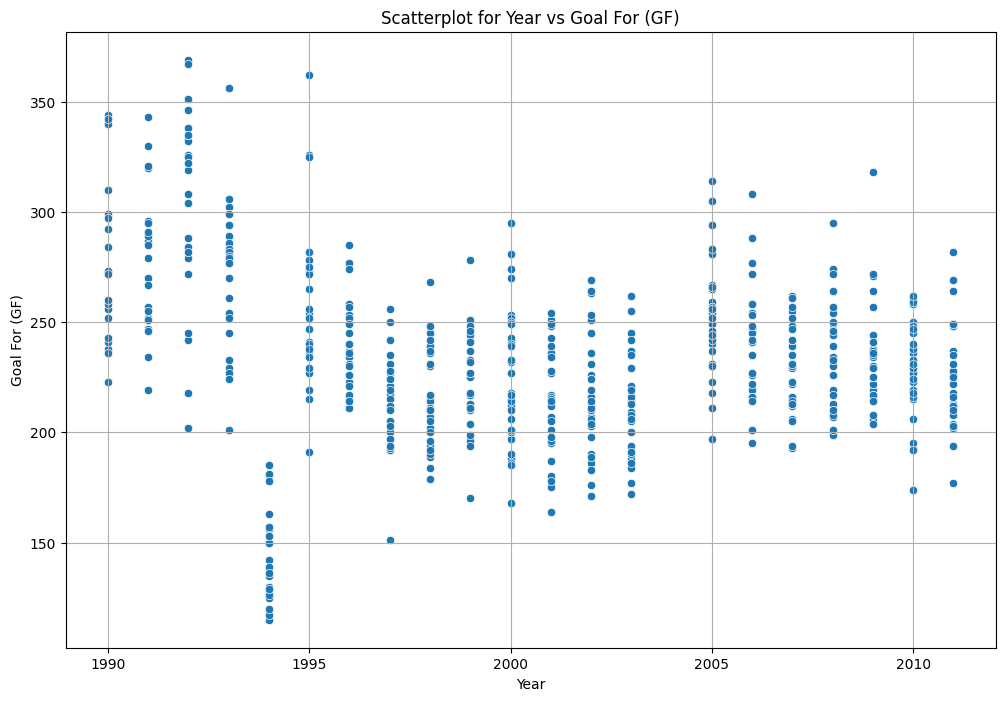

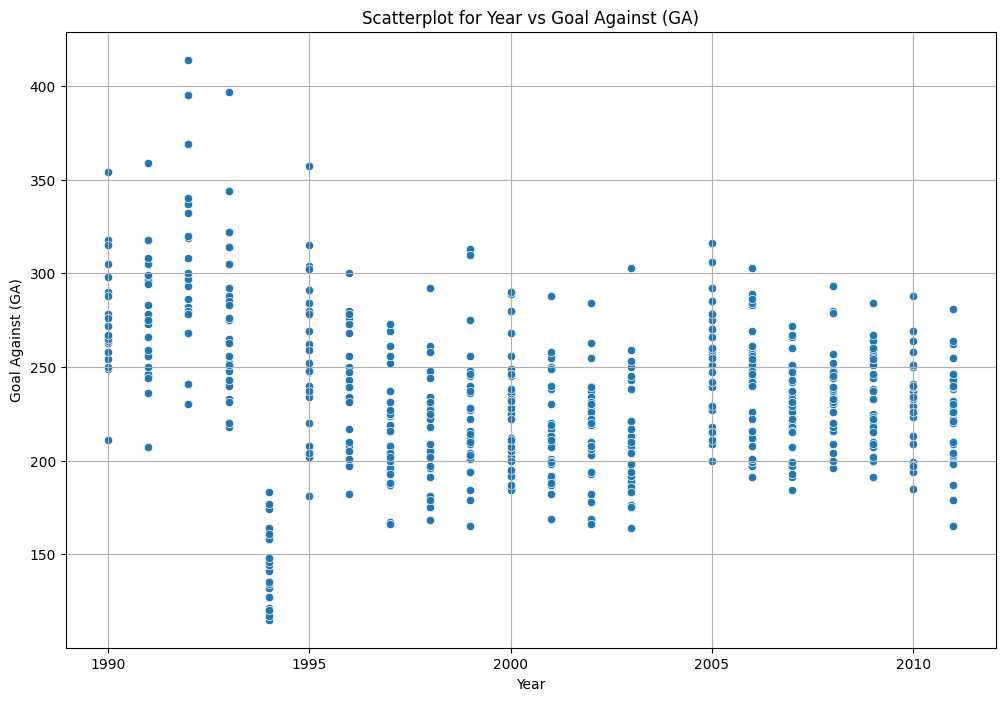

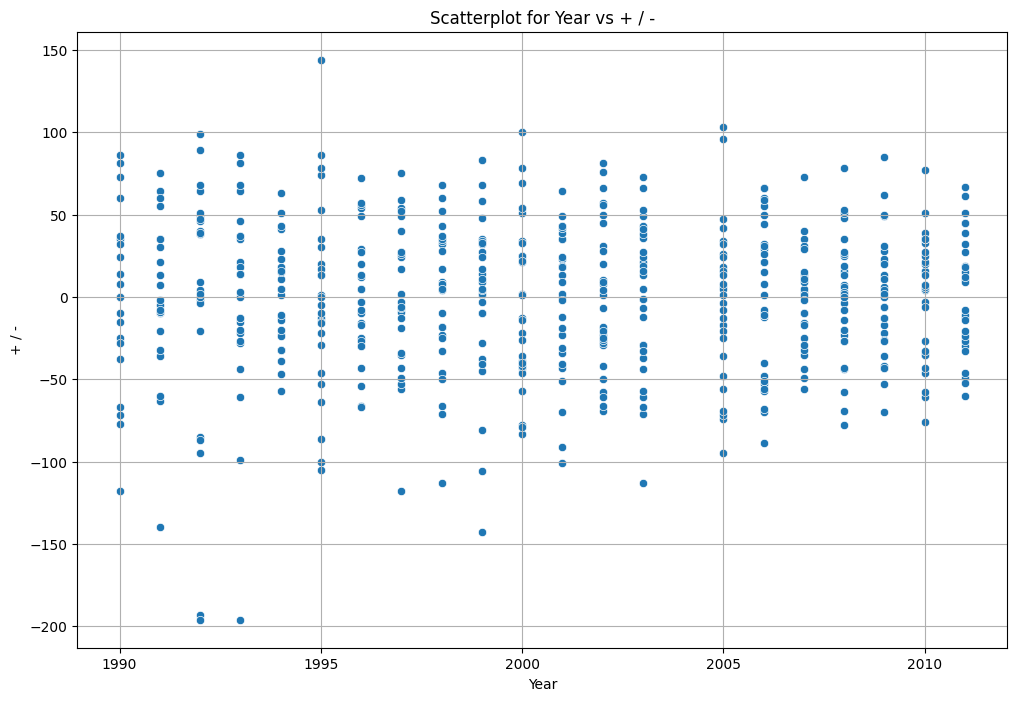

In [44]:
for i in con:
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=df, x='Year', y =i)
    plt.title(f'Scatterplot for Year vs {i}')
    plt.grid()
    plt.show()

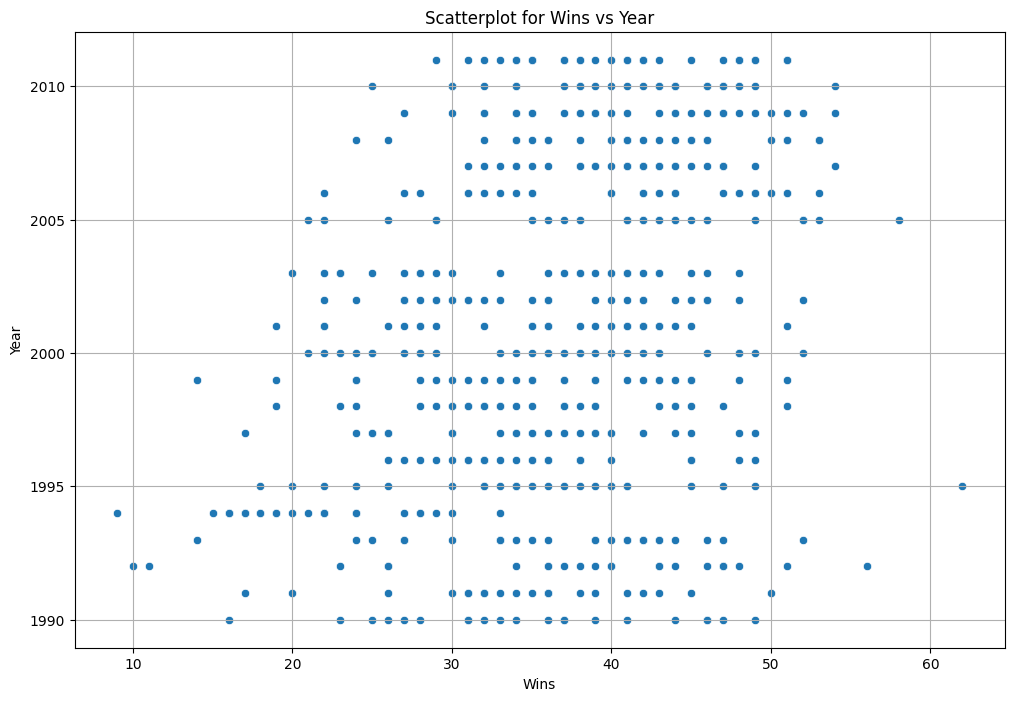

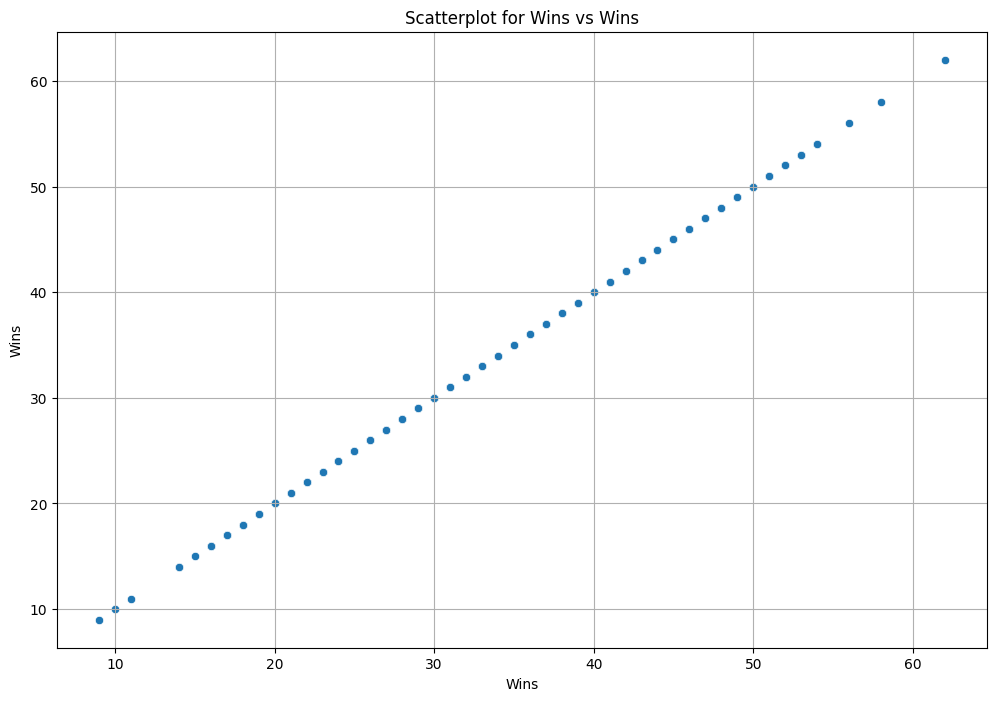

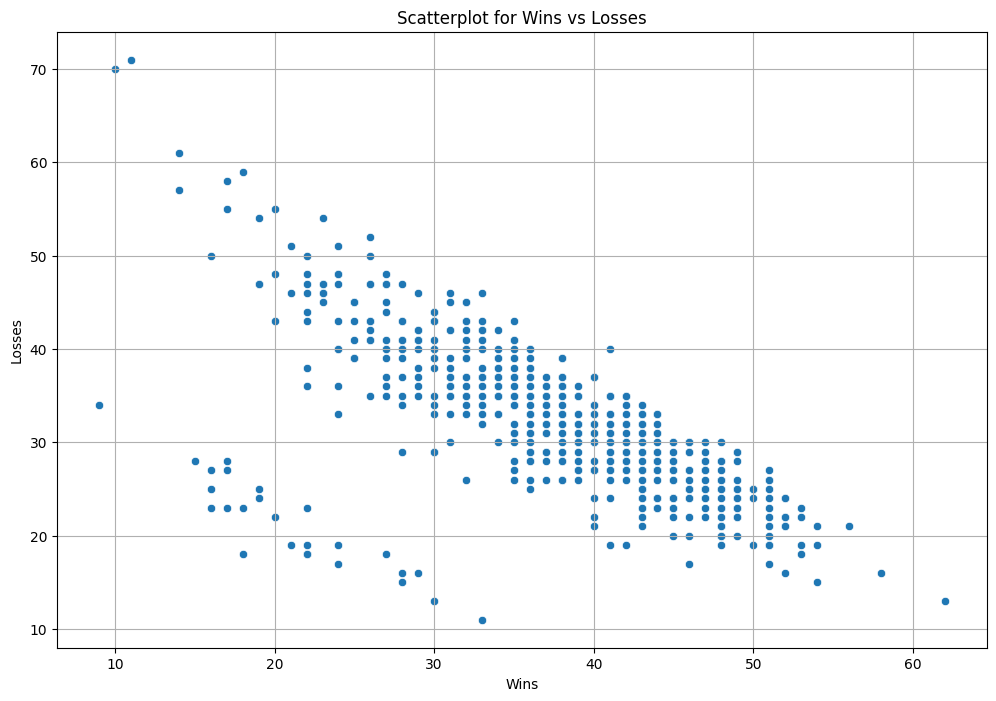

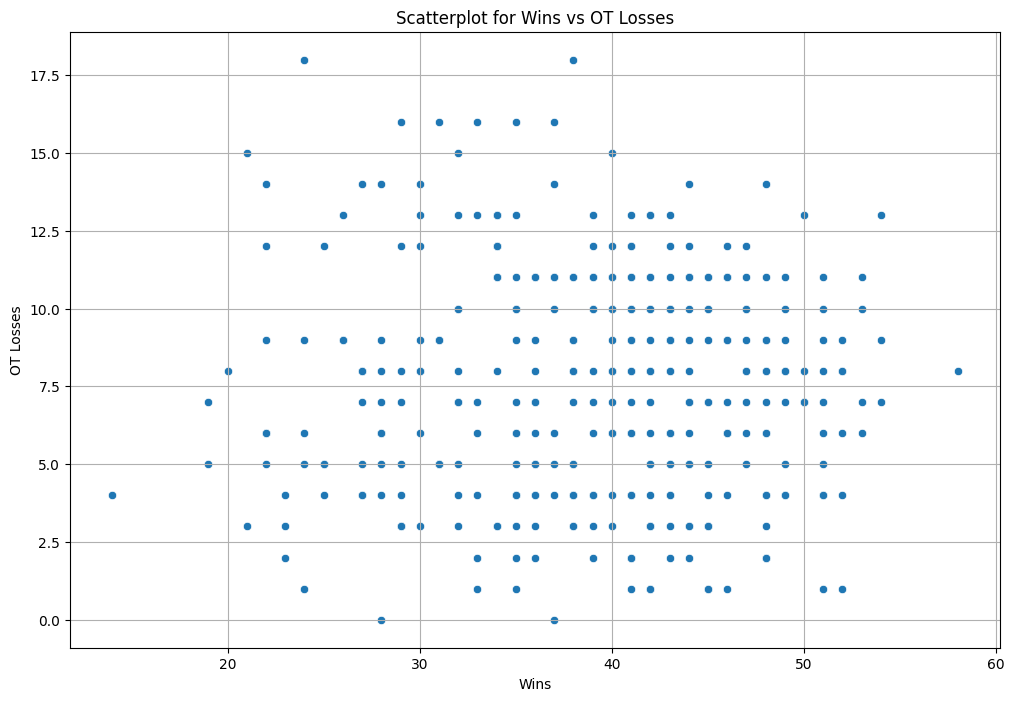

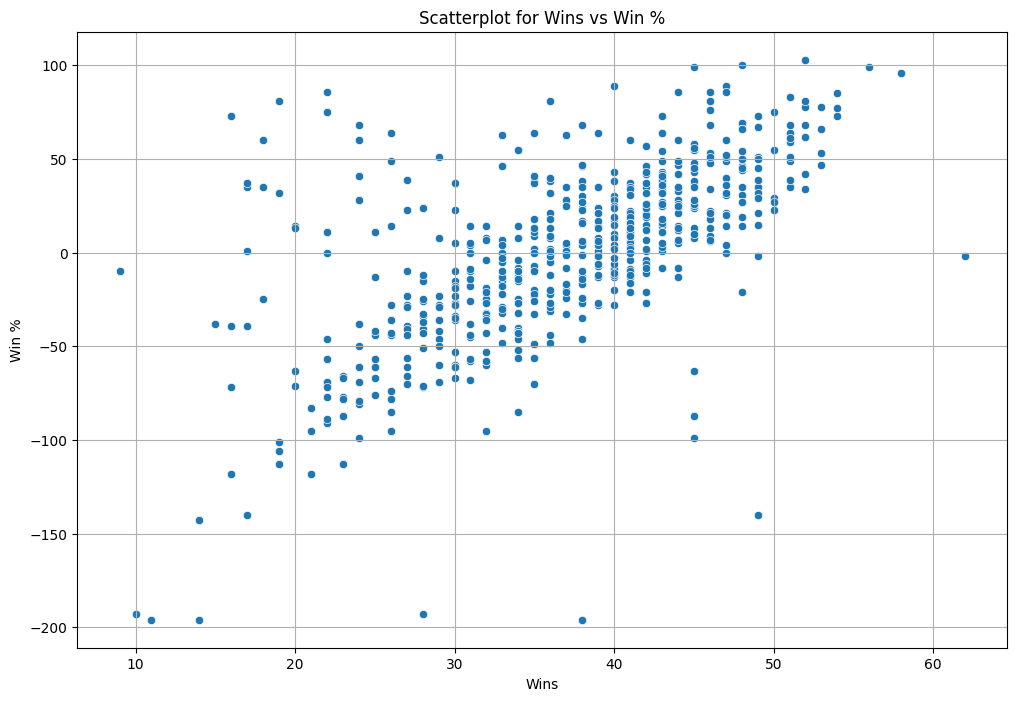

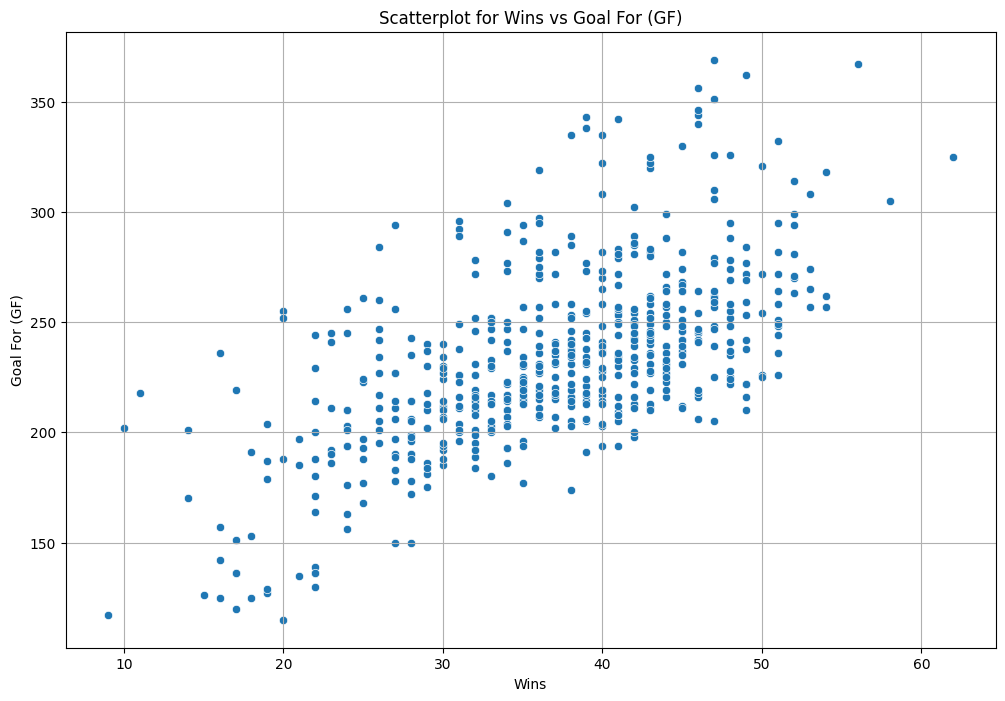

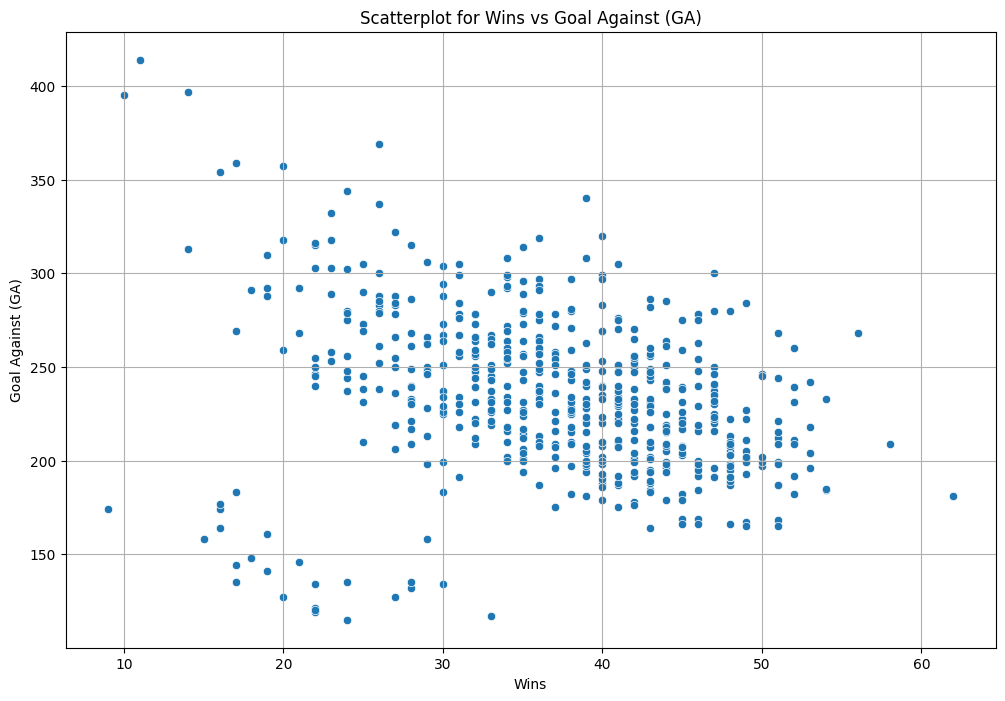

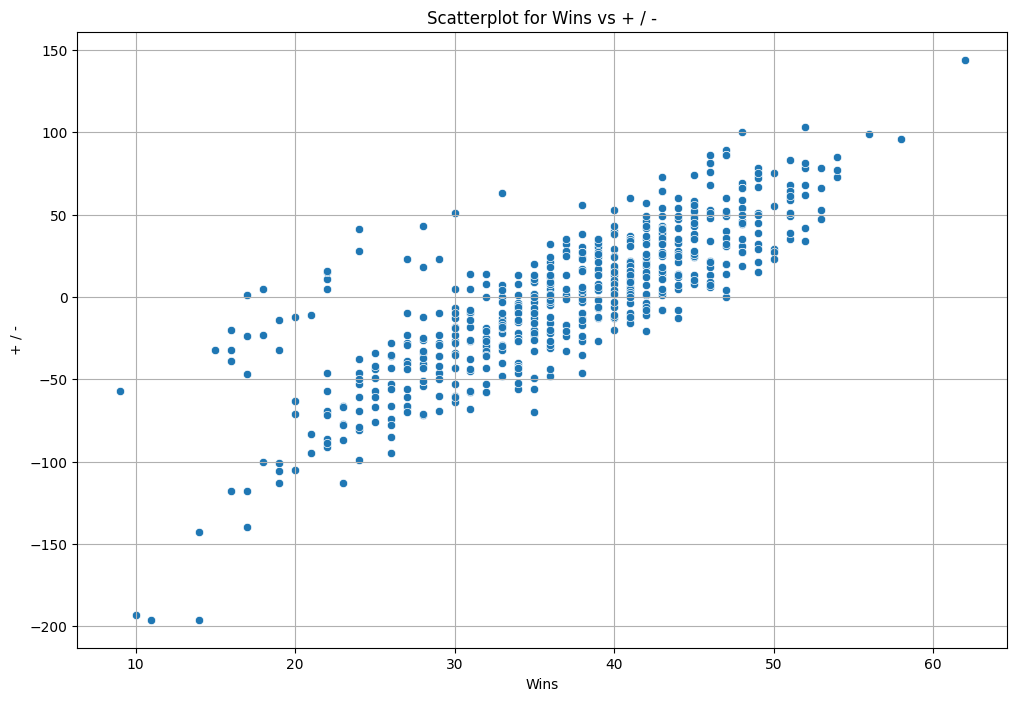

In [45]:
for i in con:
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=df, x='Wins', y =i)
    plt.title(f'Scatterplot for Wins vs {i}')
    plt.grid()
    plt.show()

## Multivariate Analysis - Pairplot

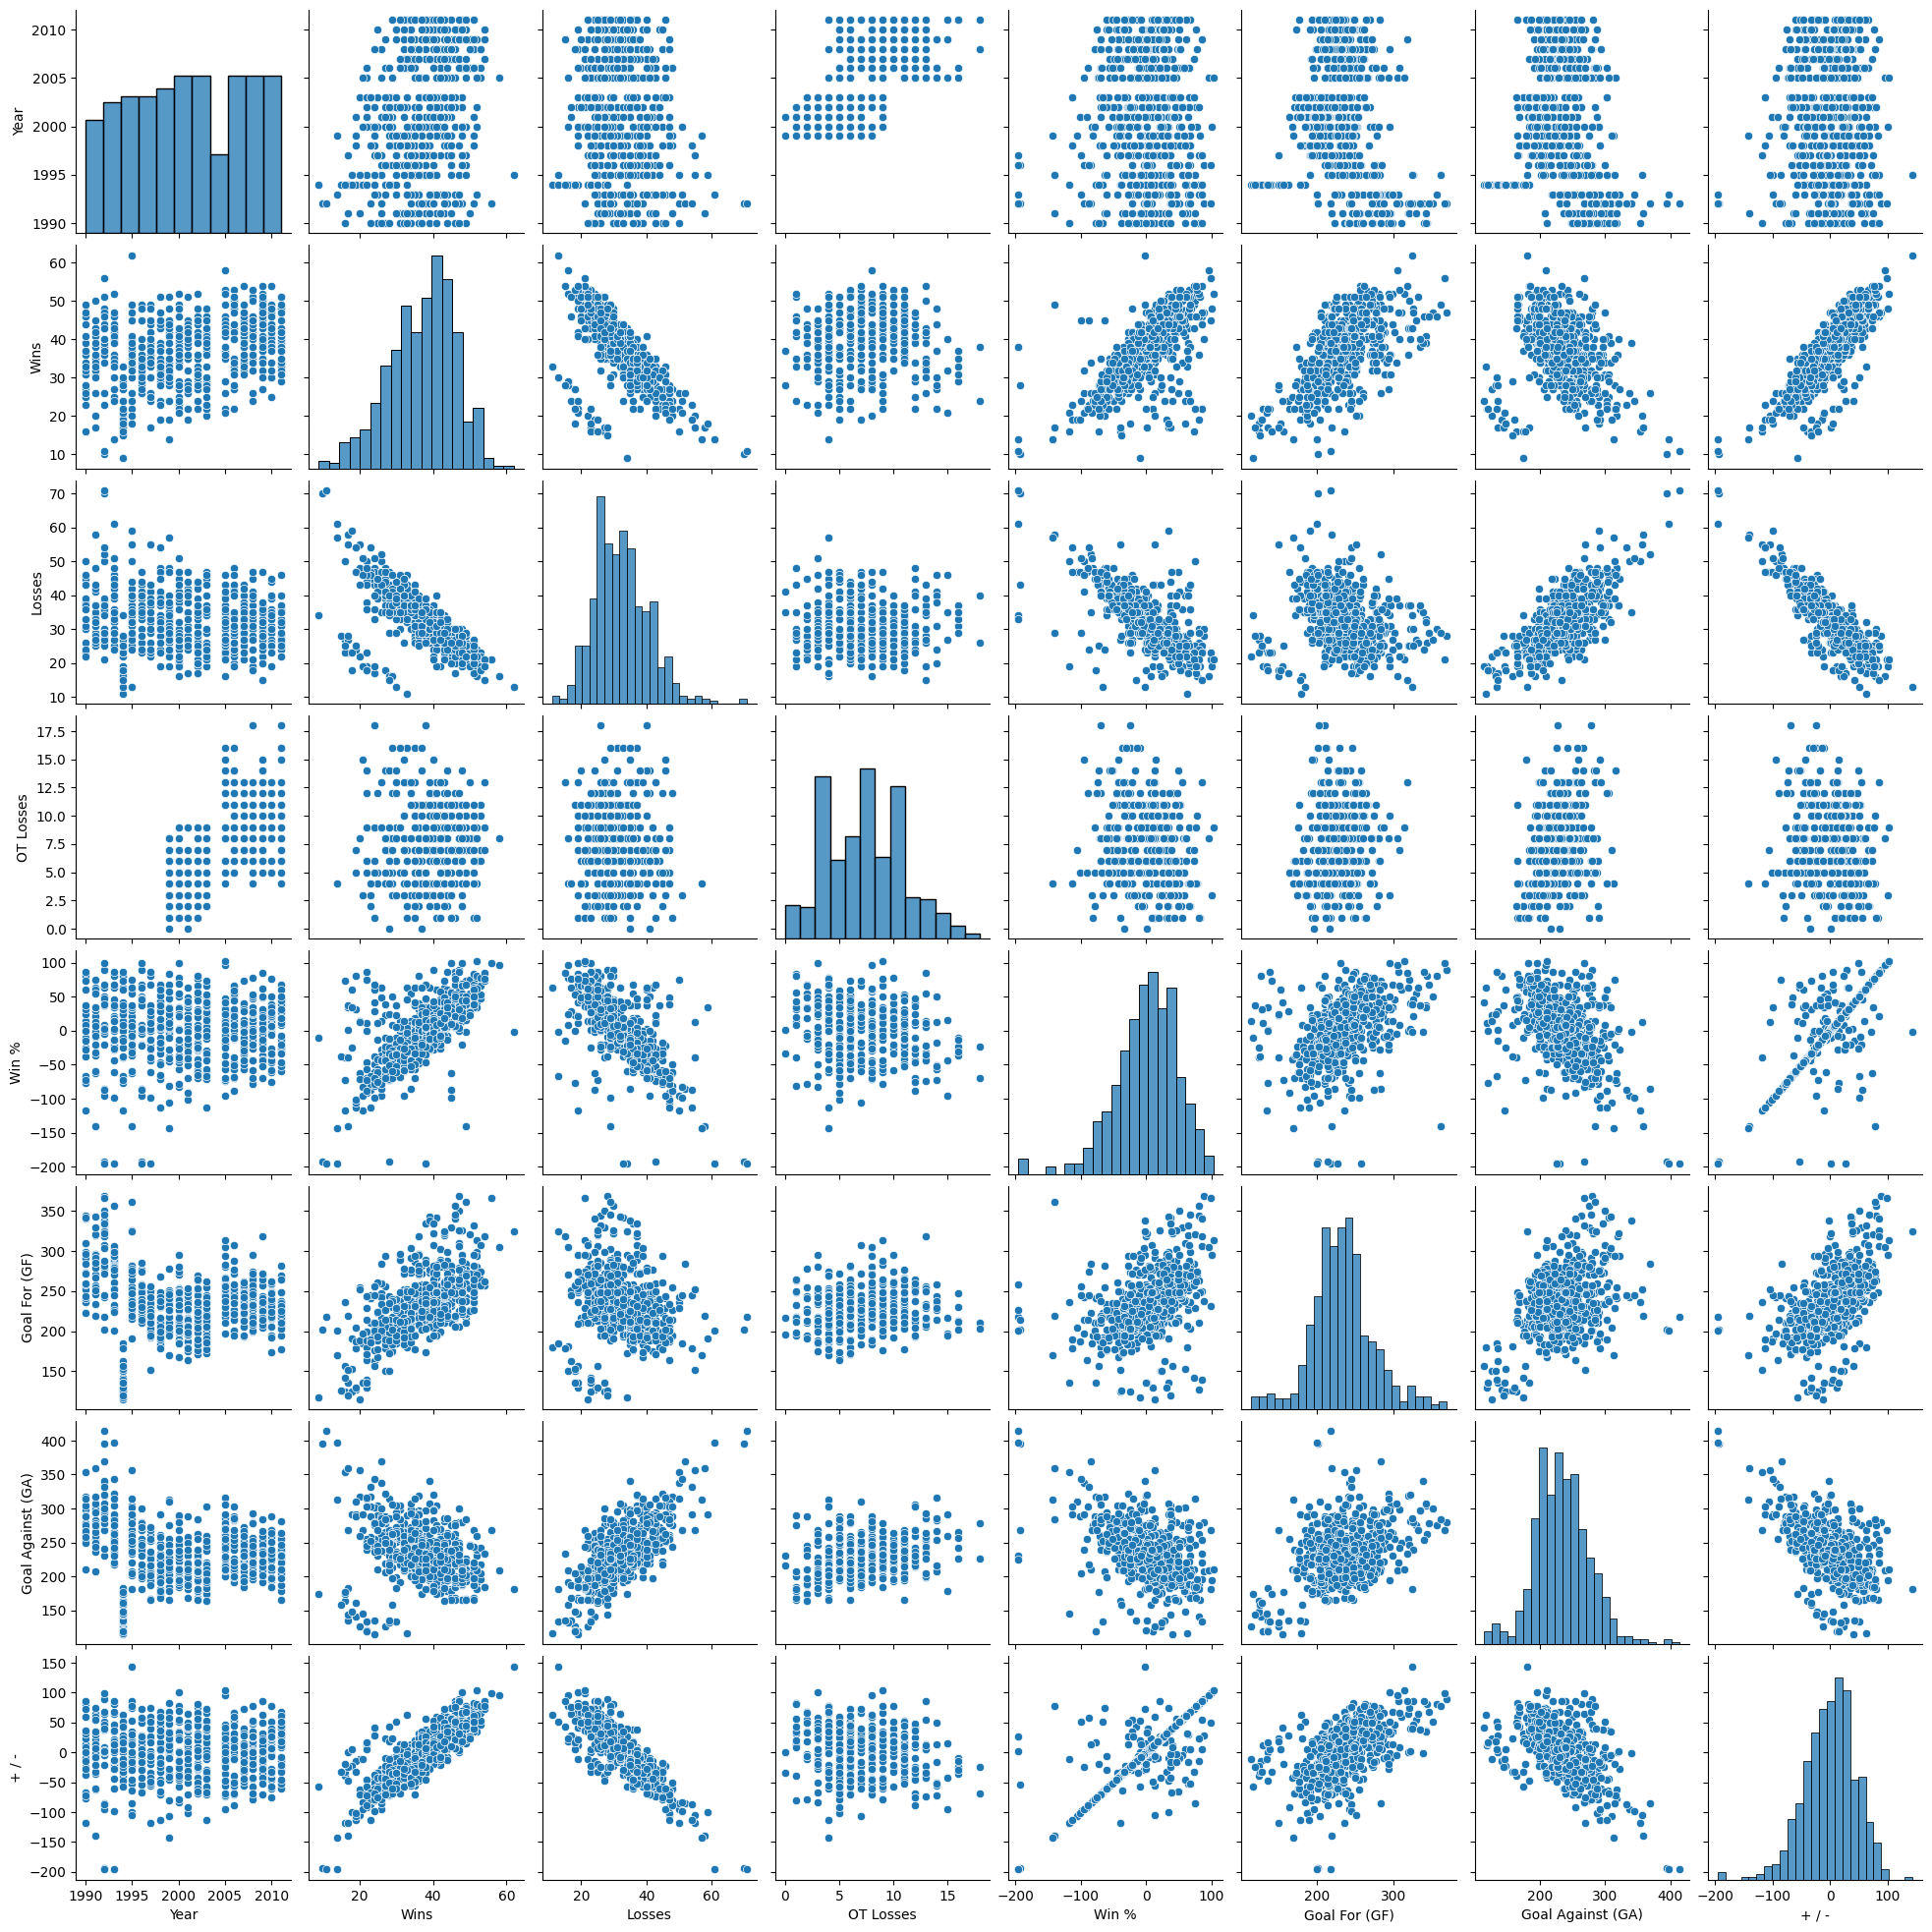

In [46]:
sns.pairplot(data=df)
plt.show()

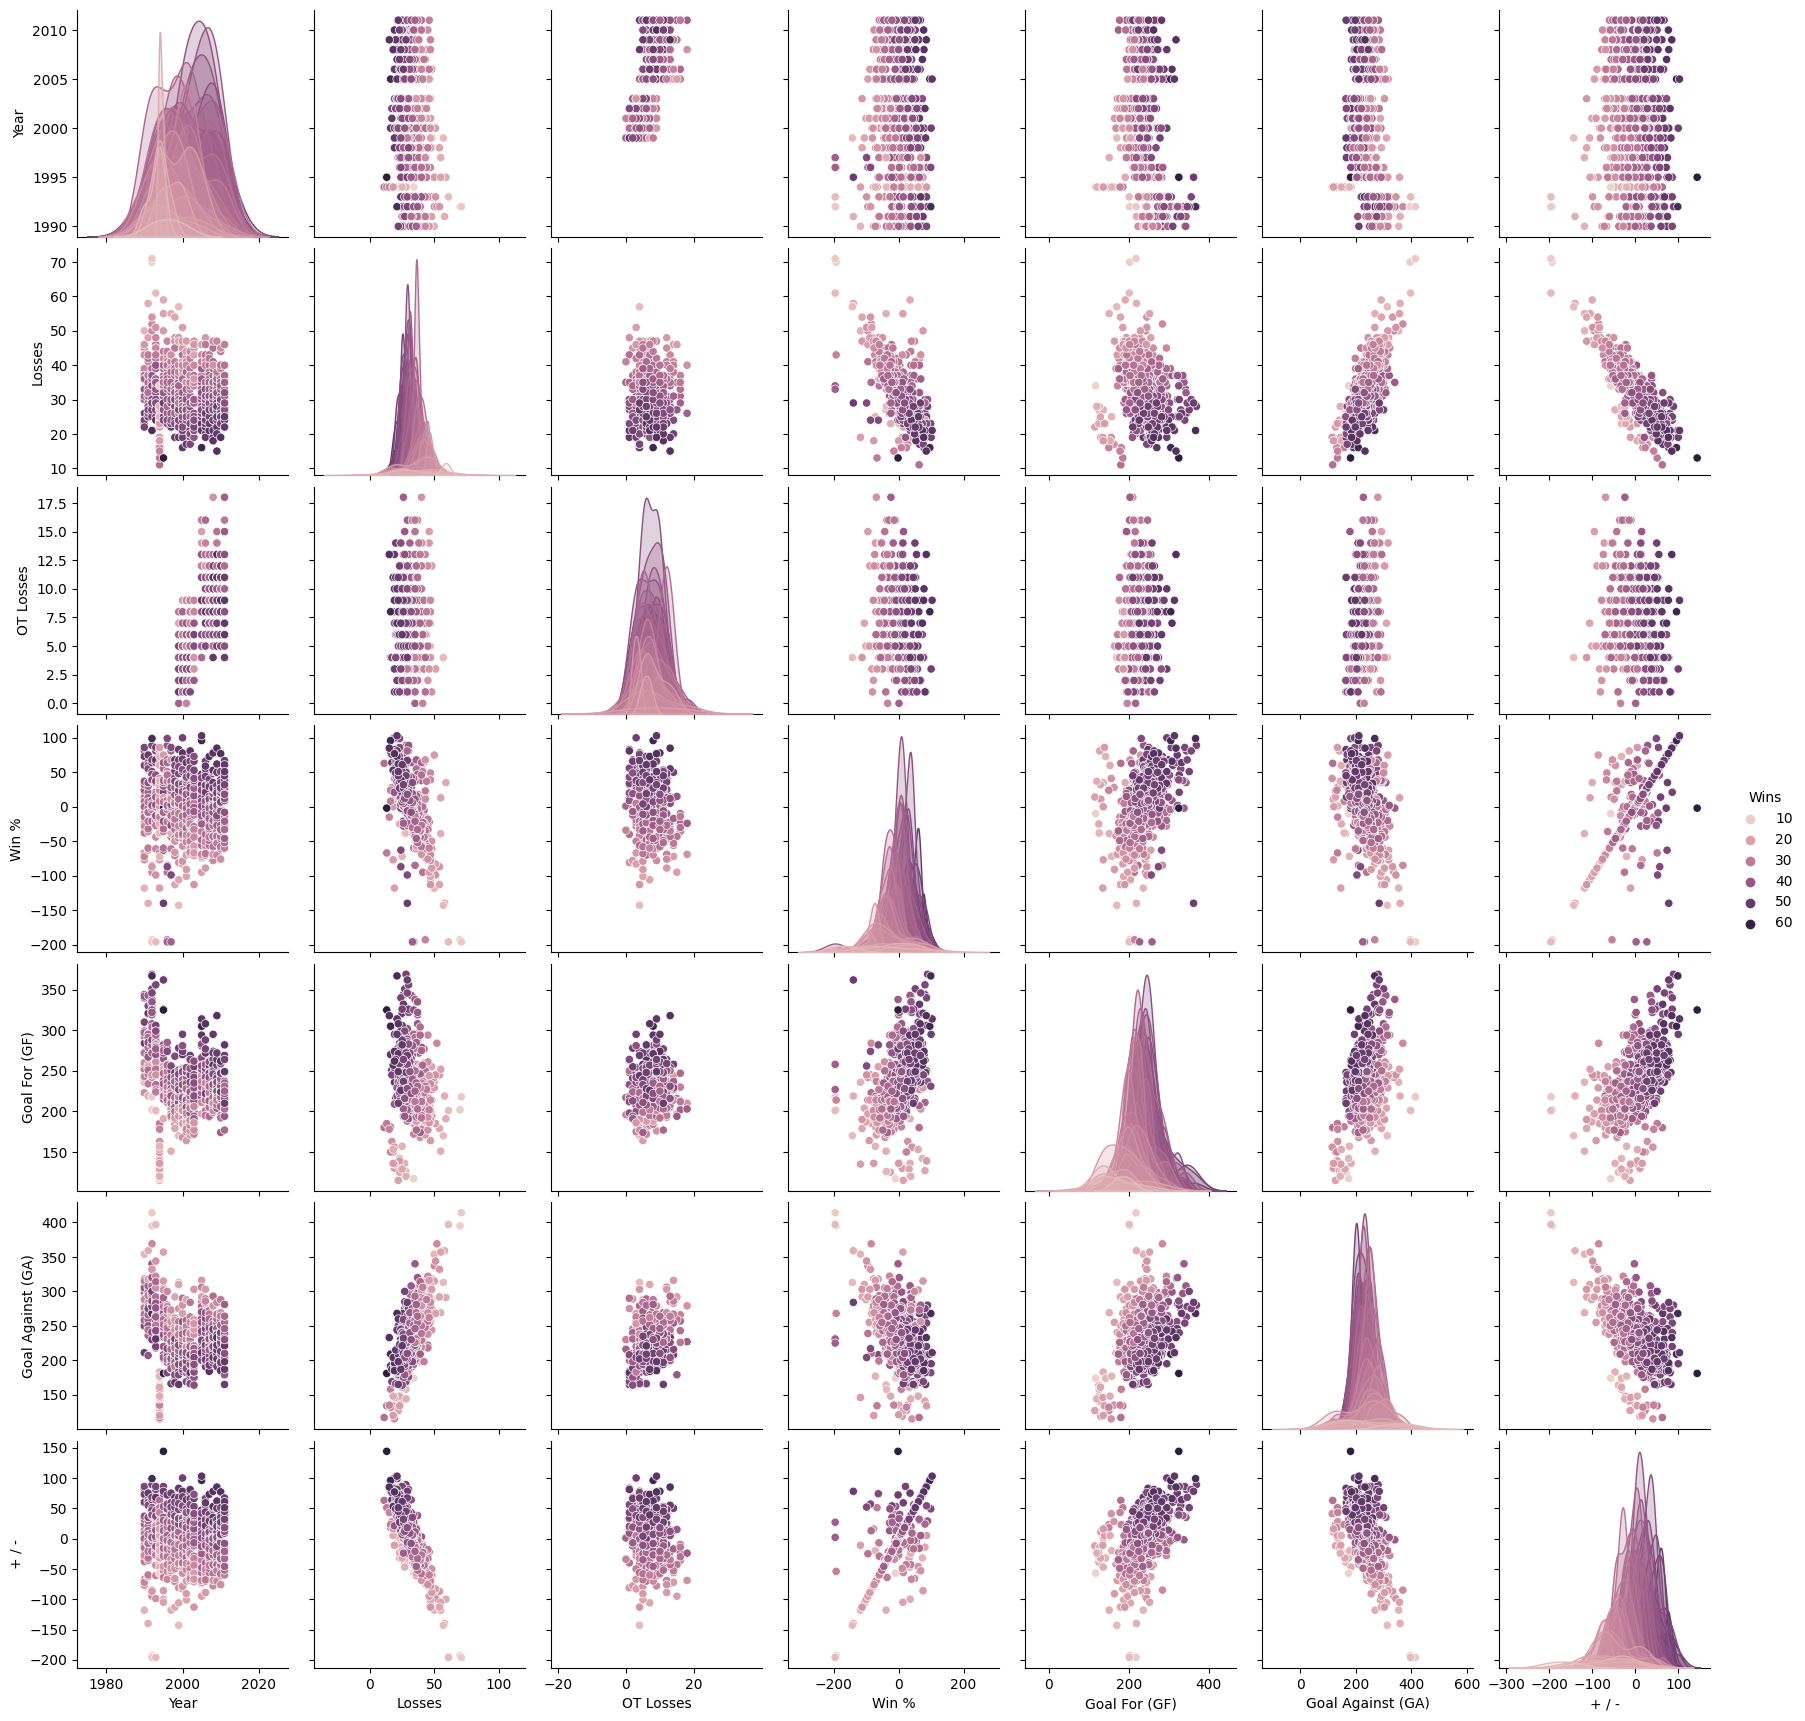

In [47]:
sns.pairplot(data=df, hue='Wins')
plt.show()